## Data - Hospital Emergency Department Data Set

In [161]:
from IPython.display import Image

In [167]:
Image(url = 'https://media.istockphoto.com/id/1217762157/vector/crowded-hospital-with-closely-standing-hospital-beds.jpg?s=170667a&w=0&k=20&c=59OJLALnE8zIAQWKS9CDQ6ykBOqPf5-bBVFwxeVbS4g=', width = 1000, height = 10)

# Main Goals:

   ### - Generate interesting analysis and insights for hospital management


   ### - Create a predictive model for time duration a patient spends in emergency room after seeing a doctor

### 1. Data Preprocessing:
### 2. Data Analysis and Insights
### 3. Feature Selection and Engineering
### 4. Training the Model:
### 5. Model Evaluation:
### 6. Hyperparameter Tuning:
### 7. Conclusion

In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats import chi2_contingency
from sklearn.model_selection import RandomizedSearchCV
from IPython.display import Image

sns.set_style("darkgrid")


In [116]:
# Load the data
data = pd.read_excel("../data/raw/ED_2009.xlsx", sheet_name = 'Generic ED Data', engine = "openpyxl")

In [117]:
# Preprocessing
data.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
1,444991,63193,4,15,2009-01-01 00:35:00,2009-01-01 03:01:00,2009-01-01 07:35:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,420,274.0,9000.0,INJURY,Z53.2,DID NOT WAIT
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN


In [118]:
data.dtypes

MRN                                               int64
Presentation Visit Number                         int64
Triage Priority                                   int64
 Age  (yrs)                                       int64
Arrival Date                             datetime64[ns]
Dr Seen Date                             datetime64[ns]
Depart Actual Date                       datetime64[ns]
Depart Status Code                               object
Departure Status Desc.                           object
Depart. Dest. Code                               object
Depart. Dest. Desc.                              object
TimeDiff Arrival-Actual Depart (mins)             int64
TimeDiff TreatDrNr-Act. Depart (mins)           float64
Presenting Complaint Code                       float64
Presenting Complaint Desc.                       object
Diag Code                                        object
Diagnosis Desc.                                  object
dtype: object

In [119]:
# Handle missing data
data.isnull().sum()

MRN                                        0
Presentation Visit Number                  0
Triage Priority                            0
 Age  (yrs)                                0
Arrival Date                               0
Dr Seen Date                             184
Depart Actual Date                         0
Depart Status Code                         0
Departure Status Desc.                     0
Depart. Dest. Code                         0
Depart. Dest. Desc.                        0
TimeDiff Arrival-Actual Depart (mins)      0
TimeDiff TreatDrNr-Act. Depart (mins)      1
Presenting Complaint Code                 19
Presenting Complaint Desc.                19
Diag Code                                  0
Diagnosis Desc.                            0
dtype: int64

In [120]:
data.loc[data["Dr Seen Date"].isnull()].head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
46,367128,63393,4,2,2009-01-01 22:42:00,NaT,2009-01-02 00:26:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,104,0.0,6000.0,ENVIRONMENTAL / TEMPERATURE,Z53.2,DID NOT WAIT
74,445062,63569,3,0,2009-01-02 22:35:00,NaT,2009-01-02 23:24:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,49,1.0,24000.0,PAEDIATRIC,Z53.2,DID NOT WAIT
75,315749,63576,4,4,2009-01-02 23:18:00,NaT,2009-01-03 00:08:00,W,DID NOT WAIT,DNW,* DID NOT WAIT,50,0.0,24000.0,PAEDIATRIC,Z53.2,DID NOT WAIT
90,110615,63642,3,13,2009-01-03 10:59:00,NaT,2009-01-03 13:40:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,161,40.0,27000.0,PSYCHIATRIC / BEHAVIOURAL,F91.9,BEHAVIOURAL PROBLEMS - CHILD
121,200843,63808,4,11,2009-01-04 09:31:00,NaT,2009-01-04 09:57:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,26,1.0,9000.0,INJURY,S01.88,LACERATED FACE


Goal of model is to predict how long a pateint is expected to stay after seeing the doctor. Instances where a patient did not wait and left before seeing the doctor are not relevant. These data points will not be included in model

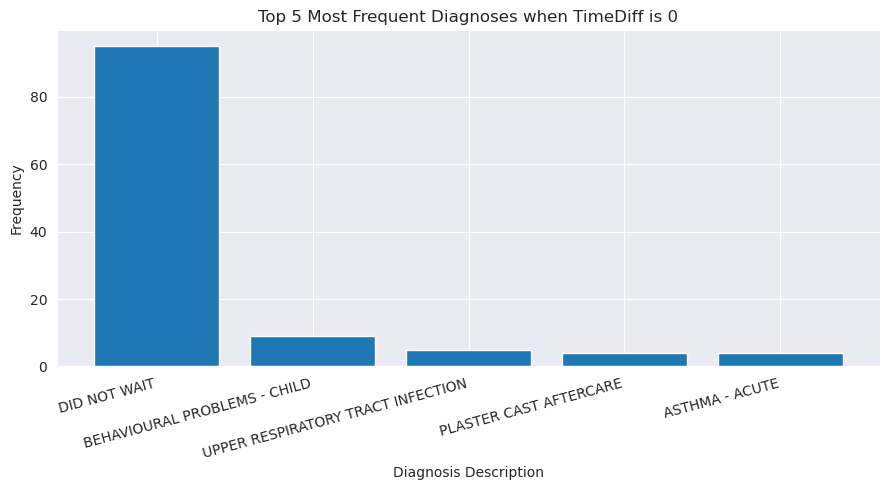

In [121]:
top_diagnosis_counts = data.loc[data["Dr Seen Date"].isnull()]["Diagnosis Desc."].value_counts().head(5)

# Sort the top diagnosis counts in descending order
top_diagnosis_counts = top_diagnosis_counts.sort_values(ascending=False)

# Create a bar plot for the top diagnosis counts
plt.figure(figsize=(9, 5))
plt.bar(top_diagnosis_counts.index, top_diagnosis_counts.values)
plt.xlabel("Diagnosis Description")
plt.ylabel("Frequency")
plt.title("Top 5 Most Frequent Diagnoses when TimeDiff is 0")
plt.xticks(rotation=15, ha="right")
plt.tight_layout()
plt.show()

In [122]:
data = data.loc[~((data["Diagnosis Desc."] == "DID NOT WAIT") | (data["Departure Status Desc."] == "DID NOT WAIT"))]

In [123]:
data.loc[data["Dr Seen Date"].isnull()].head(3)

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
90,110615,63642,3,13,2009-01-03 10:59:00,NaT,2009-01-03 13:40:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,161,40.0,27000.0,PSYCHIATRIC / BEHAVIOURAL,F91.9,BEHAVIOURAL PROBLEMS - CHILD
121,200843,63808,4,11,2009-01-04 09:31:00,NaT,2009-01-04 09:57:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,26,1.0,9000.0,INJURY,S01.88,LACERATED FACE
124,445100,63829,4,15,2009-01-04 12:22:00,NaT,2009-01-04 12:56:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,34,15.0,9000.0,INJURY,T00.9,MULTIPLE SUPERFICIAL INJURIES


Impute missing "Dr Seen Date" by calculating "Depart Actual Date" - "TimeDiff TreatDrNr-Act. Depart (mins)"


In [124]:
# Define a function to calculate the 'Dr Seen Date' based on the formula
def calculate_dr_seen_date(row):
    if pd.isnull(row['Dr Seen Date']):
        return row['Depart Actual Date'] - pd.to_timedelta(row['TimeDiff TreatDrNr-Act. Depart (mins)'], unit='minutes')
    else:
        return row['Dr Seen Date']

# Apply the function to the DataFrame to impute missing 'Dr Seen Date' values
data['Dr Seen Date'] = data.apply(calculate_dr_seen_date, axis=1)
data.isnull().sum()

MRN                                      0
Presentation Visit Number                0
Triage Priority                          0
 Age  (yrs)                              0
Arrival Date                             0
Dr Seen Date                             0
Depart Actual Date                       0
Depart Status Code                       0
Departure Status Desc.                   0
Depart. Dest. Code                       0
Depart. Dest. Desc.                      0
TimeDiff Arrival-Actual Depart (mins)    0
TimeDiff TreatDrNr-Act. Depart (mins)    0
Presenting Complaint Code                3
Presenting Complaint Desc.               3
Diag Code                                0
Diagnosis Desc.                          0
dtype: int64

In [125]:
data.loc[data["Presenting Complaint Code"].isnull()]

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
2488,324268,74422,4,4,2009-03-09 11:06:00,2009-03-09 11:27:00,2009-03-09 15:14:00,A,ADMITTED (EXCL.ED BED),2F,2F - PAEDIATRICS,248,227.0,NaN,NaN,S61.9,LACERATED FINGER
24021,488451,20676,3,3,2010-08-07 19:05:00,2010-08-07 19:27:00,2010-08-07 19:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,25,3.0,NaN,NaN,Z04.3,NO INJURY FOUND
28658,497125,39308,3,15,2010-11-22 17:31:00,2010-11-22 17:31:00,2010-11-22 17:31:00,A,ADMITTED (EXCL.ED BED),2A,2A - MENTAL HEALTH,0,0.0,NaN,NaN,F99,MENTAL ILLNESS - NO DIAGNOSIS


These 3 records where there was not there was no initial complaint made. It seems like there were three invalid occurences where the presenting complaint of the patient was not captured even when they stayed. As these are most likely data entry errors, let's remove these records

In [126]:
data = data.dropna(axis = 0, subset = ["Presenting Complaint Code"])
data = data.dropna(axis = 0, subset = ["Presenting Complaint Desc."])
data.isnull().sum()

MRN                                      0
Presentation Visit Number                0
Triage Priority                          0
 Age  (yrs)                              0
Arrival Date                             0
Dr Seen Date                             0
Depart Actual Date                       0
Depart Status Code                       0
Departure Status Desc.                   0
Depart. Dest. Code                       0
Depart. Dest. Desc.                      0
TimeDiff Arrival-Actual Depart (mins)    0
TimeDiff TreatDrNr-Act. Depart (mins)    0
Presenting Complaint Code                0
Presenting Complaint Desc.               0
Diag Code                                0
Diagnosis Desc.                          0
dtype: int64

In [127]:
data.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Depart Status Code,Departure Status Desc.,Depart. Dest. Code,Depart. Dest. Desc.,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Code,Presenting Complaint Desc.,Diag Code,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,733,619.0,4000.0,DRUG / ALCOHOL / POISONING,F43.9,EMOTIONAL CRISIS
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,13,0.0,7000.0,EYE,H10.9,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,98,26.0,25000.0,PAIN,H60.9,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,274,119.0,9000.0,INJURY,S83.6,KNEE SPRAIN / STRAIN
5,445004,63233,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,H,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,* DISCHARGED,109,9.0,9000.0,INJURY,S01.88,LACERATED FACE


There are many fields that tell the same story. For example, departure code and departure description are is giving virtually identical information on the surface. Let's test the dependency of these fields by performing chi square test. Fields that are highly dependent on one another, with a p_value = 0 will be dropped to ensure the independet variables are independent of one another and not adding redundant data to the model 


In [128]:
dependent_pairs = (('Depart Status Code', 'Departure Status Desc.'), ('Presenting Complaint Code', 'Presenting Complaint Desc.'), ('Diag Code', 'Diagnosis Desc.'))

for pair in dependent_pairs:
    contingency_table = pd.crosstab(data[pair[0]], data[pair[1]])

    # Perform the chi-square test
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(p_value)



0.0
0.0
0.0


In [129]:
data = data.drop(["Depart. Dest. Desc.", "Presenting Complaint Code", "Diag Code", "Depart Status Code"], axis = 1)


In [130]:
data.head()

,MRN,Presentation Visit Number,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.
0,67269,63190,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS
2,444992,63194,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS
3,444999,63213,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA
4,429921,63217,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN
5,445004,63233,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE


"MRN" and "Presentation" don't add any useful information to the data. They are just unique identifiers for patients and visits. Let's verify this before removing these fields. 

In [131]:
data = data.drop(["MRN", "Presentation Visit Number"], axis = 1)

In [132]:
data.head()

,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.
0,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS
2,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS
3,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA
4,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN
5,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE


There is the time difference between arrival to departure and when a pateint saw the doctor to departure. However, there is no field representing when the duration of time between arrival to seeing a doctor. 

In [133]:
# Feature Engineering
data["TimeDiff Arrival-TreatDrNr (mins)"] = data["TimeDiff Arrival-Actual Depart (mins)"] - data["TimeDiff TreatDrNr-Act. Depart (mins)"]

In [134]:
data.head()

,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.,TimeDiff Arrival-TreatDrNr (mins)
0,3,15,2009-01-01 00:17:00,2009-01-01 02:11:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS,114.0
2,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS,13.0
3,3,12,2009-01-01 03:22:00,2009-01-01 04:34:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA,72.0
4,4,15,2009-01-01 03:55:00,2009-01-01 06:30:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN,155.0
5,4,2,2009-01-01 06:40:00,2009-01-01 08:20:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE,100.0


# Data Exploration and Key Findings

## Target variable - Time duration from doctor treatment to departure

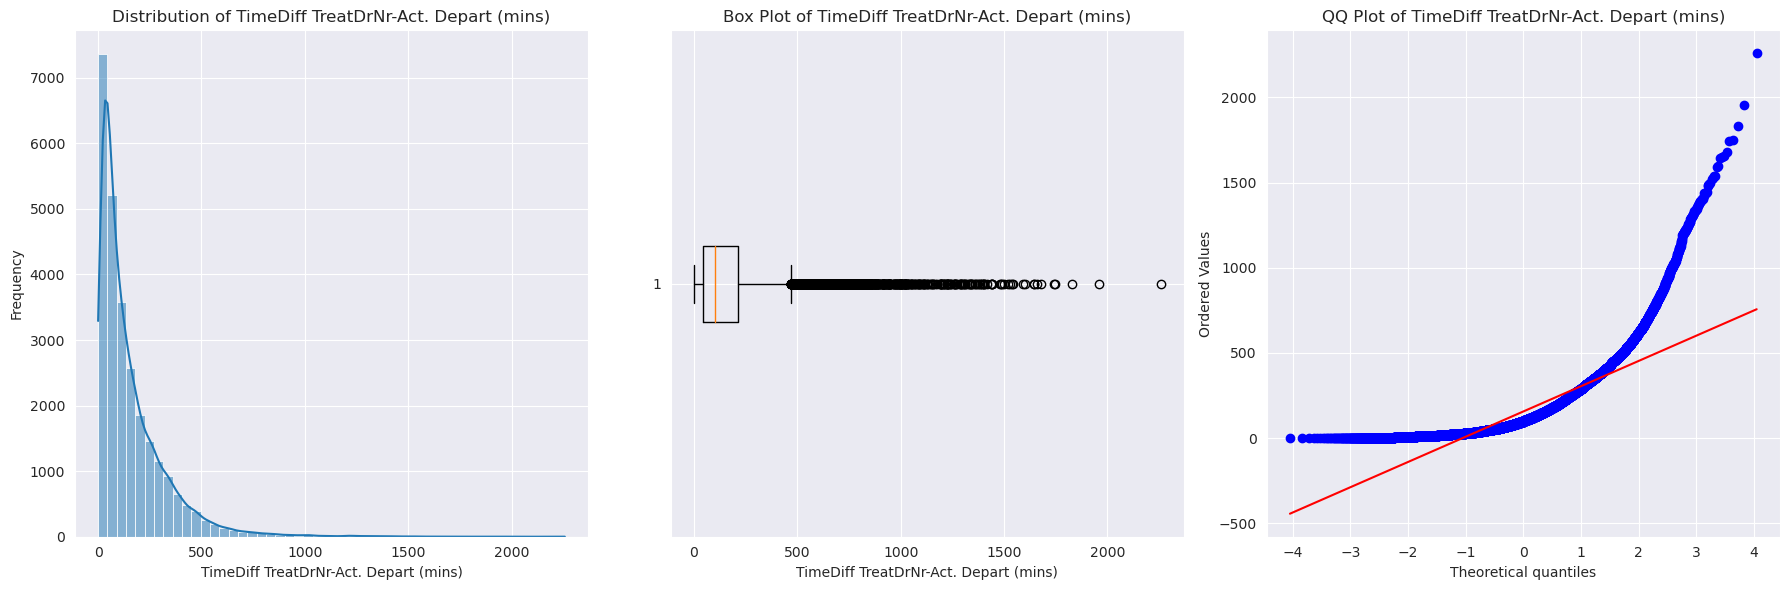

In [24]:
# Create subplots for the distribution plot, box plot, and QQ plot side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
sns.histplot(data["TimeDiff TreatDrNr-Act. Depart (mins)"], bins=50, kde=True, ax=ax1)
ax1.set_xlabel("TimeDiff TreatDrNr-Act. Depart (mins)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of TimeDiff TreatDrNr-Act. Depart (mins)")
ax2.boxplot(data["TimeDiff TreatDrNr-Act. Depart (mins)"], vert=False)
ax2.set_xlabel("TimeDiff TreatDrNr-Act. Depart (mins)")
ax2.set_title("Box Plot of TimeDiff TreatDrNr-Act. Depart (mins)")
stats.probplot(data["TimeDiff TreatDrNr-Act. Depart (mins)"], plot=ax3)
ax3.set_title("QQ Plot of TimeDiff TreatDrNr-Act. Depart (mins)")
plt.tight_layout()
plt.show()

- Distribution appears to follow exponential decay distribution
- Positively skewed: apply a transformation to bring it closer to an even normal distribution. Let's try a log1p and square root transformation as it's great at dealing with positive values. All time durations are positive.
- Outliers: check again after transformation 

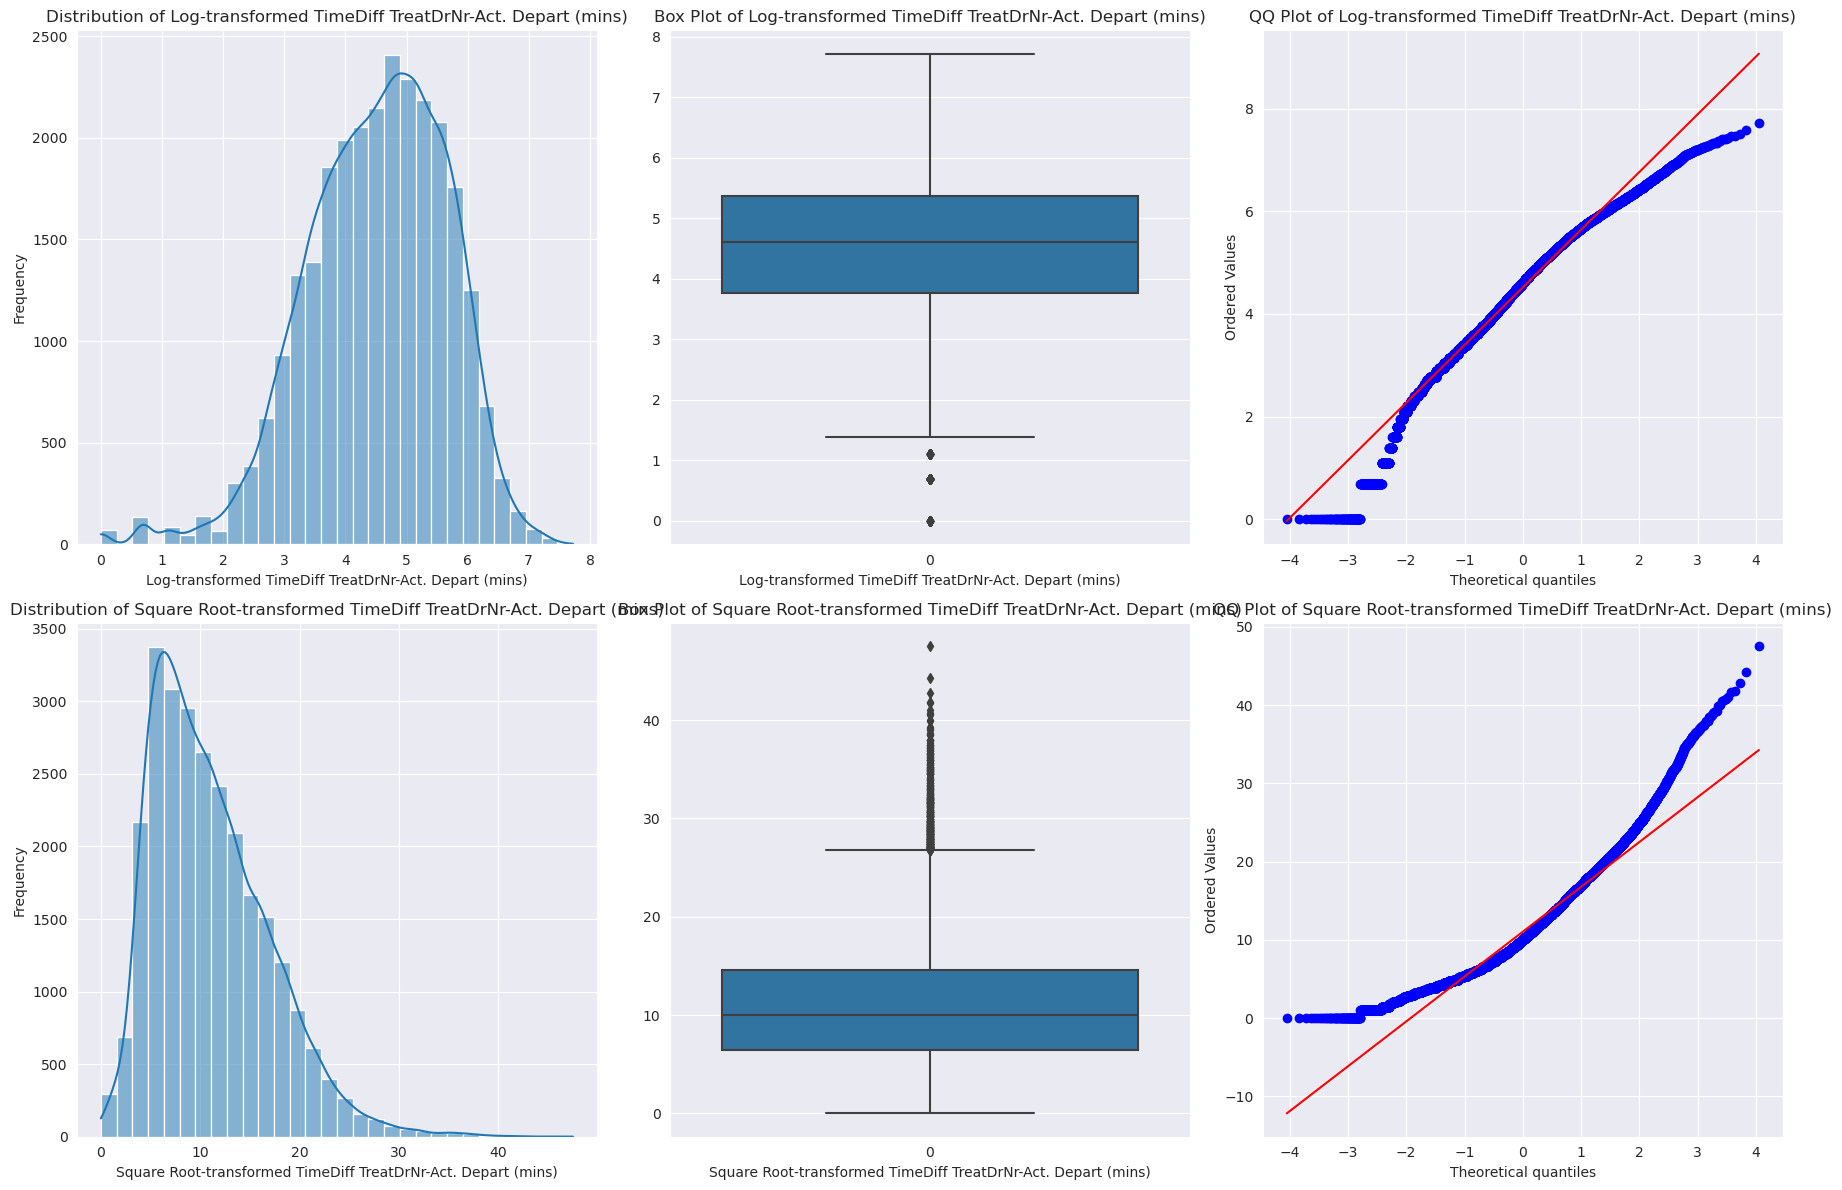

In [25]:

# Apply log and square root transformations to the target variable
target_variable = "TimeDiff TreatDrNr-Act. Depart (mins)"
# Create subplots for the distribution plots and QQ plots for each transformation
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Transformation 1: Log transformation
sns.histplot(np.log1p(data[target_variable]), bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_xlabel("Log-transformed " + target_variable)
axes[0, 0].set_ylabel("Frequency")
axes[0, 0].set_title("Distribution of Log-transformed " + target_variable)

sns.boxplot(np.log1p(data[target_variable]), ax=axes[0, 1])
axes[0, 1].set_xlabel("Log-transformed " + target_variable)
axes[0, 1].set_title("Box Plot of Log-transformed " + target_variable)

stats.probplot(np.log1p(data[target_variable]), plot=axes[0, 2])
axes[0, 2].set_title("QQ Plot of Log-transformed " + target_variable)

# Transformation 2: Square root transformation
sns.histplot(np.sqrt(data[target_variable]), bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_xlabel("Square Root-transformed " + target_variable)
axes[1, 0].set_ylabel("Frequency")
axes[1, 0].set_title("Distribution of Square Root-transformed " + target_variable)

sns.boxplot(np.sqrt(data[target_variable]), ax=axes[1, 1])
axes[1, 1].set_xlabel("Square Root-transformed " + target_variable)
axes[1, 1].set_title("Box Plot of Square Root-transformed " + target_variable)

stats.probplot(np.sqrt(data[target_variable]), plot=axes[1, 2])
axes[1, 2].set_title("QQ Plot of Square Root-transformed " + target_variable)

plt.tight_layout()
plt.show()


- Log transformation looks most optimal to most closely follow a even normal distributoin.
- Check for outliers 

In [26]:
data['log(TimeDiff TreatDrNr-Act. Depart (mins))'] = np.log1p(data['TimeDiff TreatDrNr-Act. Depart (mins)'])
# Calculate the mean and standard deviation of the log-transformed target
mean_log_transformed = data['log(TimeDiff TreatDrNr-Act. Depart (mins))'].mean()
std_log_transformed = data['log(TimeDiff TreatDrNr-Act. Depart (mins))'].std()

# Define the threshold for outliers (e.g., 3 standard deviations from the mean)
lower_threshold = mean_log_transformed - 3 * std_log_transformed
upper_threshold = mean_log_transformed + 3 * std_log_transformed

# Filter the data to keep only the rows within the threshold
outliers_data = data[(data['log(TimeDiff TreatDrNr-Act. Depart (mins))'] < lower_threshold) | (data['log(TimeDiff TreatDrNr-Act. Depart (mins))'] > upper_threshold)]
outliers_data.head()

,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.,TimeDiff Arrival-TreatDrNr (mins),log(TimeDiff TreatDrNr-Act. Depart (mins))
2,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS,13.0,0.000000
121,4,11,2009-01-04 09:31:00,2009-01-04 09:56:00,2009-01-04 09:57:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,26,1.0,INJURY,LACERATED FACE,25.0,0.693147
155,4,6,2009-01-04 22:00:00,2009-01-04 22:06:00,2009-01-04 22:07:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,7,1.0,INJURY,ED REVIEW,6.0,0.693147
177,4,8,2009-01-05 19:08:00,2009-01-05 19:12:00,2009-01-05 19:13:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,5,1.0,PAIN,FINGER SUPERFICIAL FOREIGN BODY,4.0,0.693147
235,4,5,2009-01-07 07:19:00,2009-01-07 07:37:00,2009-01-07 07:38:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,19,1.0,PAEDIATRIC,OTITIS MEDIA,18.0,0.693147


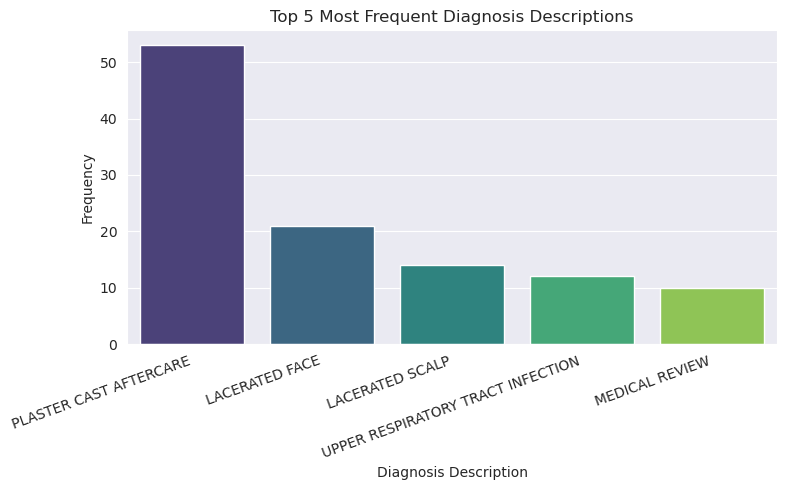

In [27]:
# Plot the bar plot of the top 5 most frequent values in 'Diagnosis Desc.'
top_diagnosis = outliers_data["Diagnosis Desc."].value_counts().sort_values(ascending=False).head(5)
plt.figure(figsize=(8, 5))
sns.barplot(x=top_diagnosis.index, y=top_diagnosis.values, palette='viridis')
plt.xlabel('Diagnosis Description')
plt.ylabel('Frequency')
plt.title('Top 5 Most Frequent Diagnosis Descriptions')
plt.xticks(rotation=20, ha='right')
plt.tight_layout()
plt.show()


- Most outliers consist of patients that left within 2 minutes of seeing a doctor
- Given the diagnoses are legitimate cases, these appear to be valid data points. "Plaster Cast Aftercare" is most frequent instance, which most likely doesn't need too much after care in the hospital after seeing the doctor

According to the Victoria Agency for Health Information, the benchmark for all emergency department is to keep each patient's total time spent in hospital under "four hour rule" (https://vahi.vic.gov.au/emergency-care/length-stay#:~:text=The%20'four%20hour%20rule'%20means,the%20National%20Emergency%20Access%20Target.)

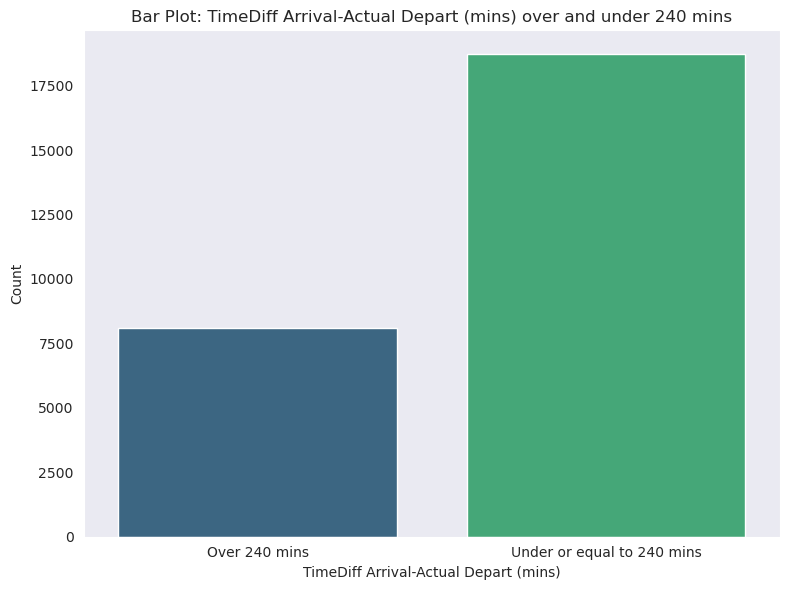

In [28]:
# Filter the data based on "TimeDiff Arrival-Actual Depart (mins)" values
data_over_240 = data[data['TimeDiff Arrival-Actual Depart (mins)'] > 240]
data_under_240 = data[data['TimeDiff Arrival-Actual Depart (mins)'] <= 240]

# Get the counts for each category
counts_over_240 = data_over_240['TimeDiff Arrival-Actual Depart (mins)'].count()
counts_under_240 = data_under_240['TimeDiff Arrival-Actual Depart (mins)'].count()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Over 240 mins', 'Under or equal to 240 mins'], y=[counts_over_240, counts_under_240], palette='viridis')
plt.xlabel('TimeDiff Arrival-Actual Depart (mins)')
plt.ylabel('Count')
plt.title('Bar Plot: TimeDiff Arrival-Actual Depart (mins) over and under 240 mins')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- Approximately one third of patients took a total time more than 240 minutes


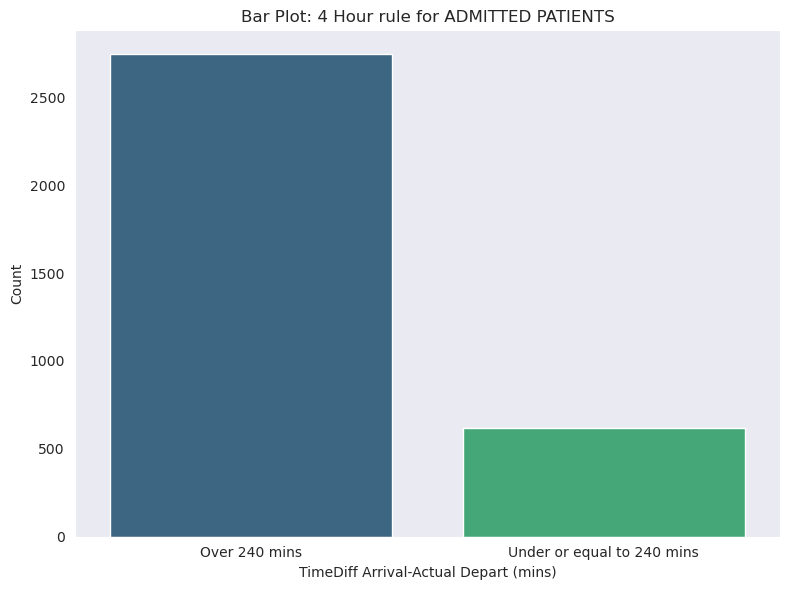

In [157]:
# Filter the data based on "TimeDiff Arrival-Actual Depart (mins)" values
temp = data[data['Departure Status Desc.'] == 'ADMITTED (EXCL.ED BED)']

data_over_240 = temp[temp['TimeDiff Arrival-Actual Depart (mins)'] > 240]
data_under_240 = temp[temp['TimeDiff Arrival-Actual Depart (mins)'] <= 240]

# Get the counts for each category
counts_over_240 = data_over_240['TimeDiff Arrival-Actual Depart (mins)'].count()
counts_under_240 = data_under_240['TimeDiff Arrival-Actual Depart (mins)'].count()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Over 240 mins', 'Under or equal to 240 mins'], y=[counts_over_240, counts_under_240], palette='viridis')
plt.xlabel('TimeDiff Arrival-Actual Depart (mins)')
plt.ylabel('Count')
plt.title('Bar Plot: 4 Hour distribution for ADMITTED PATIENTS')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

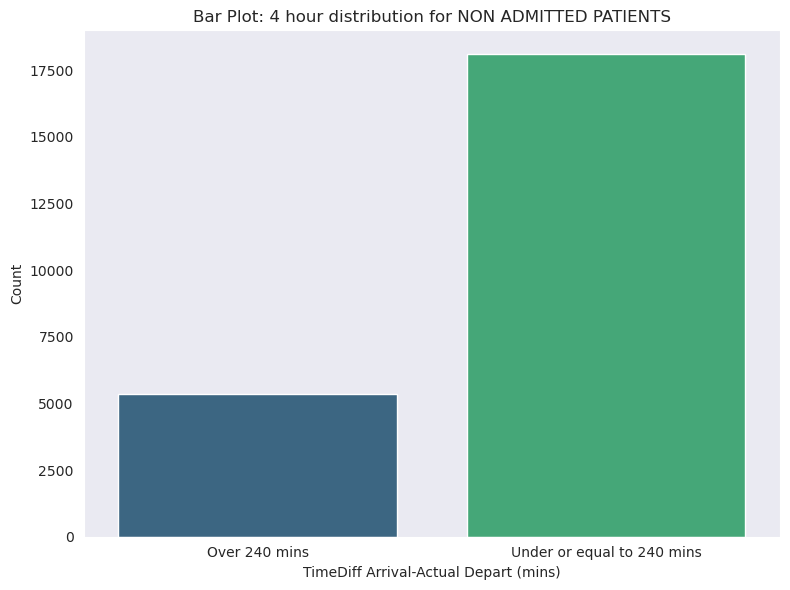

In [158]:
# Filter the data based on "TimeDiff Arrival-Actual Depart (mins)" values
temp = data[data['Departure Status Desc.'] != 'ADMITTED (EXCL.ED BED)']

data_over_240 = temp[temp['TimeDiff Arrival-Actual Depart (mins)'] > 240]
data_under_240 = temp[temp['TimeDiff Arrival-Actual Depart (mins)'] <= 240]

# Get the counts for each category
counts_over_240 = data_over_240['TimeDiff Arrival-Actual Depart (mins)'].count()
counts_under_240 = data_under_240['TimeDiff Arrival-Actual Depart (mins)'].count()

# Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=['Over 240 mins', 'Under or equal to 240 mins'], y=[counts_over_240, counts_under_240], palette='viridis')
plt.xlabel('TimeDiff Arrival-Actual Depart (mins)')
plt.ylabel('Count')
plt.title('Bar Plot: 4 hour distribution for NON ADMITTED PATIENTS')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


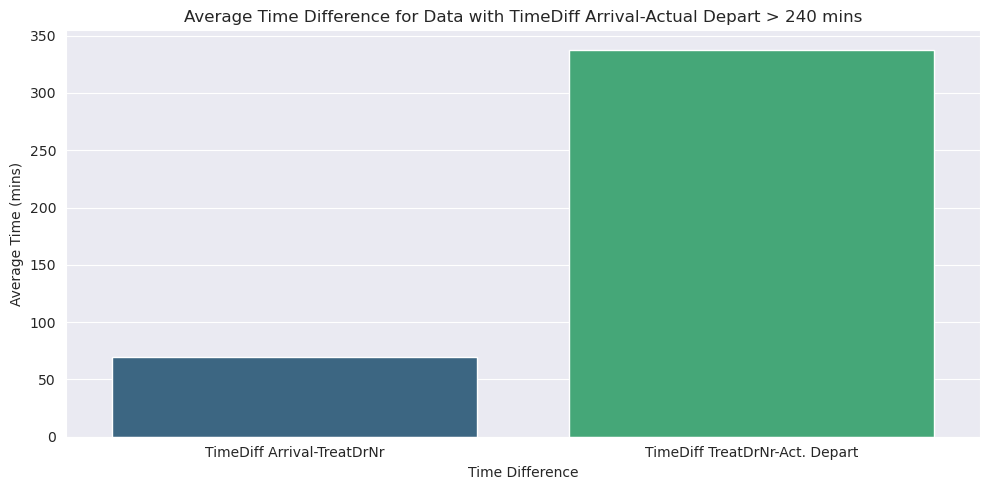

In [30]:
# Calculate the average TimeDiff Arrival-TreatDrNr (mins) and TimeDiff TreatDrNr-Act. Depart (mins)
average_arrival_treat_dr = data_over_240['TimeDiff Arrival-TreatDrNr (mins)'].mean()
average_treat_dr_depart = data_over_240['TimeDiff TreatDrNr-Act. Depart (mins)'].mean()

# Create the bar plot for average TimeDiff Arrival-TreatDrNr (mins) and TimeDiff TreatDrNr-Act. Depart (mins)
plt.figure(figsize=(10, 5))
sns.barplot(x=['TimeDiff Arrival-TreatDrNr', 'TimeDiff TreatDrNr-Act. Depart'],
            y=[average_arrival_treat_dr, average_treat_dr_depart], palette='viridis')
plt.xlabel('Time Difference')
plt.ylabel('Average Time (mins)')
plt.title('Average Time Difference for Data with TimeDiff Arrival-Actual Depart > 240 mins')
plt.tight_layout()
plt.show()


- Most patients that stayed over 4 hours were admitted patients to the same hospital. A far fewer proportion of patients stay over 4 hours if they are not admitted.
- The main reason most patients stay over 4 hours is due to long times spent in hospital after being diagnosed by a doctor

### Age Analysis

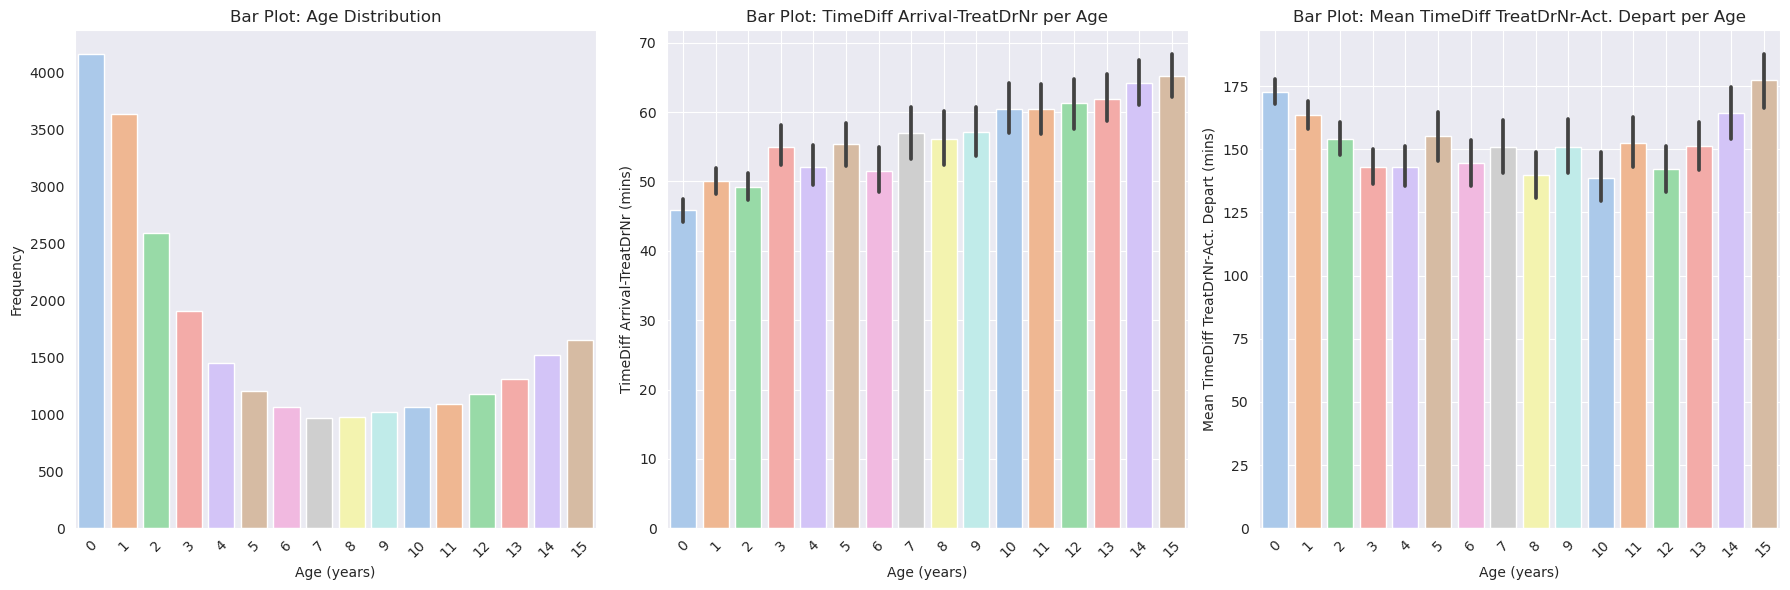

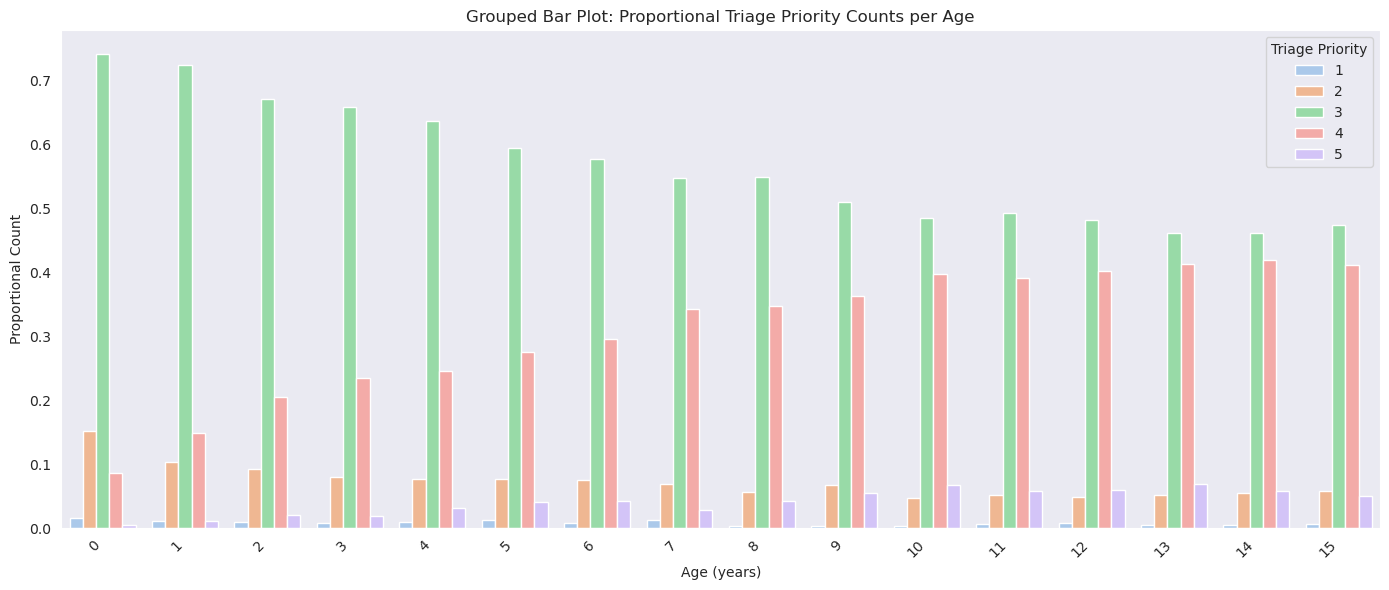

In [31]:
age_counts = data[' Age  (yrs)'].value_counts()
age_counts = age_counts.sort_index()
age_analysis = data.groupby(' Age  (yrs)')['TimeDiff Arrival-TreatDrNr (mins)'].mean().reset_index()
time_diff_depart_by_age = data.groupby(' Age  (yrs)')['TimeDiff TreatDrNr-Act. Depart (mins)'].mean().reset_index()

# Create subplots with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot the bar plot of the 'Age' distribution
sns.barplot(x=age_counts.index, y=age_counts.values, ax=axes[0], palette='pastel')
axes[0].set_xlabel('Age (years)')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Bar Plot: Age Distribution')
axes[0].grid(axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Plot the bar plot of 'TimeDiff Arrival-TreatDrNr (mins)' for each age
sns.barplot(x=' Age  (yrs)', y='TimeDiff Arrival-TreatDrNr (mins)', data=data, ax=axes[1], palette='pastel')
axes[1].set_xlabel('Age (years)')
axes[1].set_ylabel('TimeDiff Arrival-TreatDrNr (mins)')
axes[1].set_title('Bar Plot: TimeDiff Arrival-TreatDrNr per Age')
axes[1].grid(True)
axes[1].tick_params(axis='x', rotation=45)

# Plot the bar plot of 'TimeDiff TreatDrNr-Act. Depart (mins)' for each age
sns.barplot(x=' Age  (yrs)', y='TimeDiff TreatDrNr-Act. Depart (mins)', data=data, ax=axes[2], palette='pastel')
axes[2].set_xlabel('Age (years)')
axes[2].set_ylabel('Mean TimeDiff TreatDrNr-Act. Depart (mins)')
axes[2].set_title('Bar Plot: Mean TimeDiff TreatDrNr-Act. Depart per Age')
axes[2].grid(True)
axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

triage_counts_by_age = data.groupby([' Age  (yrs)', 'Triage Priority']).size().reset_index(name='Count')
total_counts_by_age = triage_counts_by_age.groupby(' Age  (yrs)')['Count'].sum().reset_index(name='Total Count')
triage_counts_by_age = triage_counts_by_age.merge(total_counts_by_age, on=' Age  (yrs)')
triage_counts_by_age['Proportional Count'] = triage_counts_by_age['Count'] / triage_counts_by_age['Total Count']
triage_counts_by_age = triage_counts_by_age.sort_values(by=' Age  (yrs)')

# Create the grouped bar plot for Proportional Triage Priority Counts per Age
plt.figure(figsize=(14, 6))
sns.barplot(x=' Age  (yrs)', y='Proportional Count', hue='Triage Priority', data=triage_counts_by_age, palette='pastel')
plt.xlabel('Age (years)')
plt.ylabel('Proportional Count')
plt.title('Grouped Bar Plot: Proportional Triage Priority Counts per Age')
plt.legend(title='Triage Priority')
plt.grid(axis='y')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

- Age ranges between 1 - 15. This data seems to come from a children's hospital
- As age decreases, average time between arrival to doctor treatment decreases. Based on higher distribution of more urgent triages with younger children, data suggests the hospital prioritises seeing younger children, resulting in them having shorter waiting times until seeing a doctor
- No obvious trend between age and time duration between doctor treatment to departure

## Triage Priority 

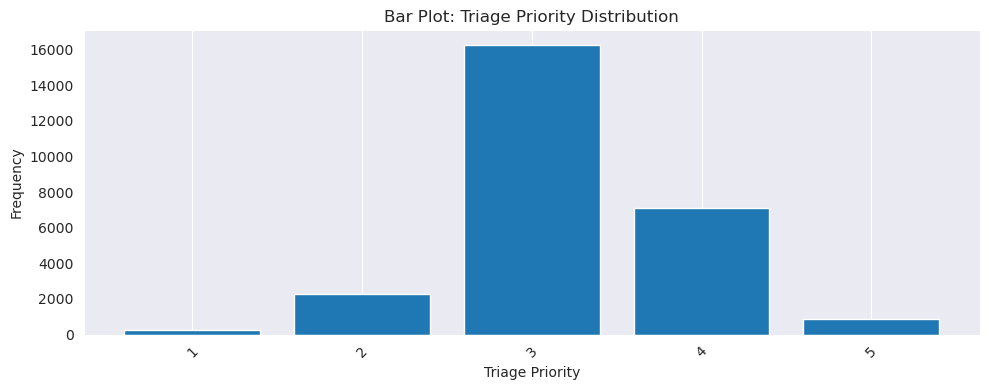

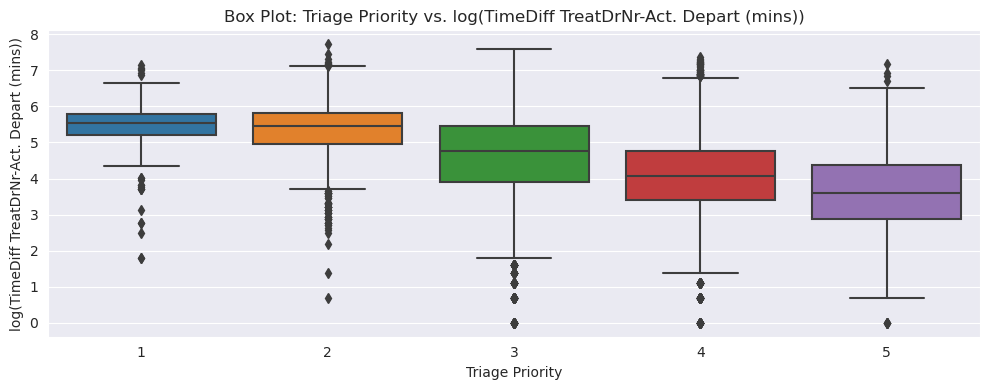

In [32]:
# Count the occurrences of each unique 'Triage Priority'
triage_priority_counts = data['Triage Priority'].value_counts()
triage_priority_counts = triage_priority_counts.sort_index()

# Plot the count distribution graph for 'Triage Priority'
plt.figure(figsize=(10, 4))
plt.bar(triage_priority_counts.index, triage_priority_counts.values)
plt.xlabel('Triage Priority')
plt.ylabel('Frequency')
plt.title('Bar Plot: Triage Priority Distribution')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()

# Plot the boxplot of 'TimeDiff Arrival-TreatDrNr (mins)' for each 'Triage Priority'
plt.figure(figsize=(10, 4))
sns.boxplot(x='Triage Priority', y='log(TimeDiff TreatDrNr-Act. Depart (mins))', data=data)
plt.xlabel('Triage Priority')
plt.ylabel('log(TimeDiff TreatDrNr-Act. Depart (mins))')
plt.title('Box Plot: Triage Priority vs. log(TimeDiff TreatDrNr-Act. Depart (mins))')
plt.tight_layout()

plt.show()

Triage has a very uneven distribution highly skewed in 3 or 4. According to the Victoria Agency for Health Information (https://vahi.vic.gov.au/emergency-care/patients-treated-urgency-category) , Triage is categorised as:
- Triage category 1 (need for resuscitation): requires treatment immediately
- Triage category 2 (emergency): requires treatment within 10 minutes
- Triage category 3 (urgent): requires treatment within 30 minutes
- Triage category 4 (semi-urgent): requires treatment within 1 hour
- Triage category 5 (non-urgent): requires treatment within 2 hours.

Based on this scale, most children are deemed as urgent or semi-urgent in this children's hospital. Only in a few cases are they categorised as an emergency or higher, with also very few being non-urgent.

- As triage goes down, meaning as priority of the patient reduces, the average time spent after seeing a doctor also decreases. This suggests that less serious instances usually require less time to be spent in ER after a diagnosis. Let's explore how triage and diagnoses interact

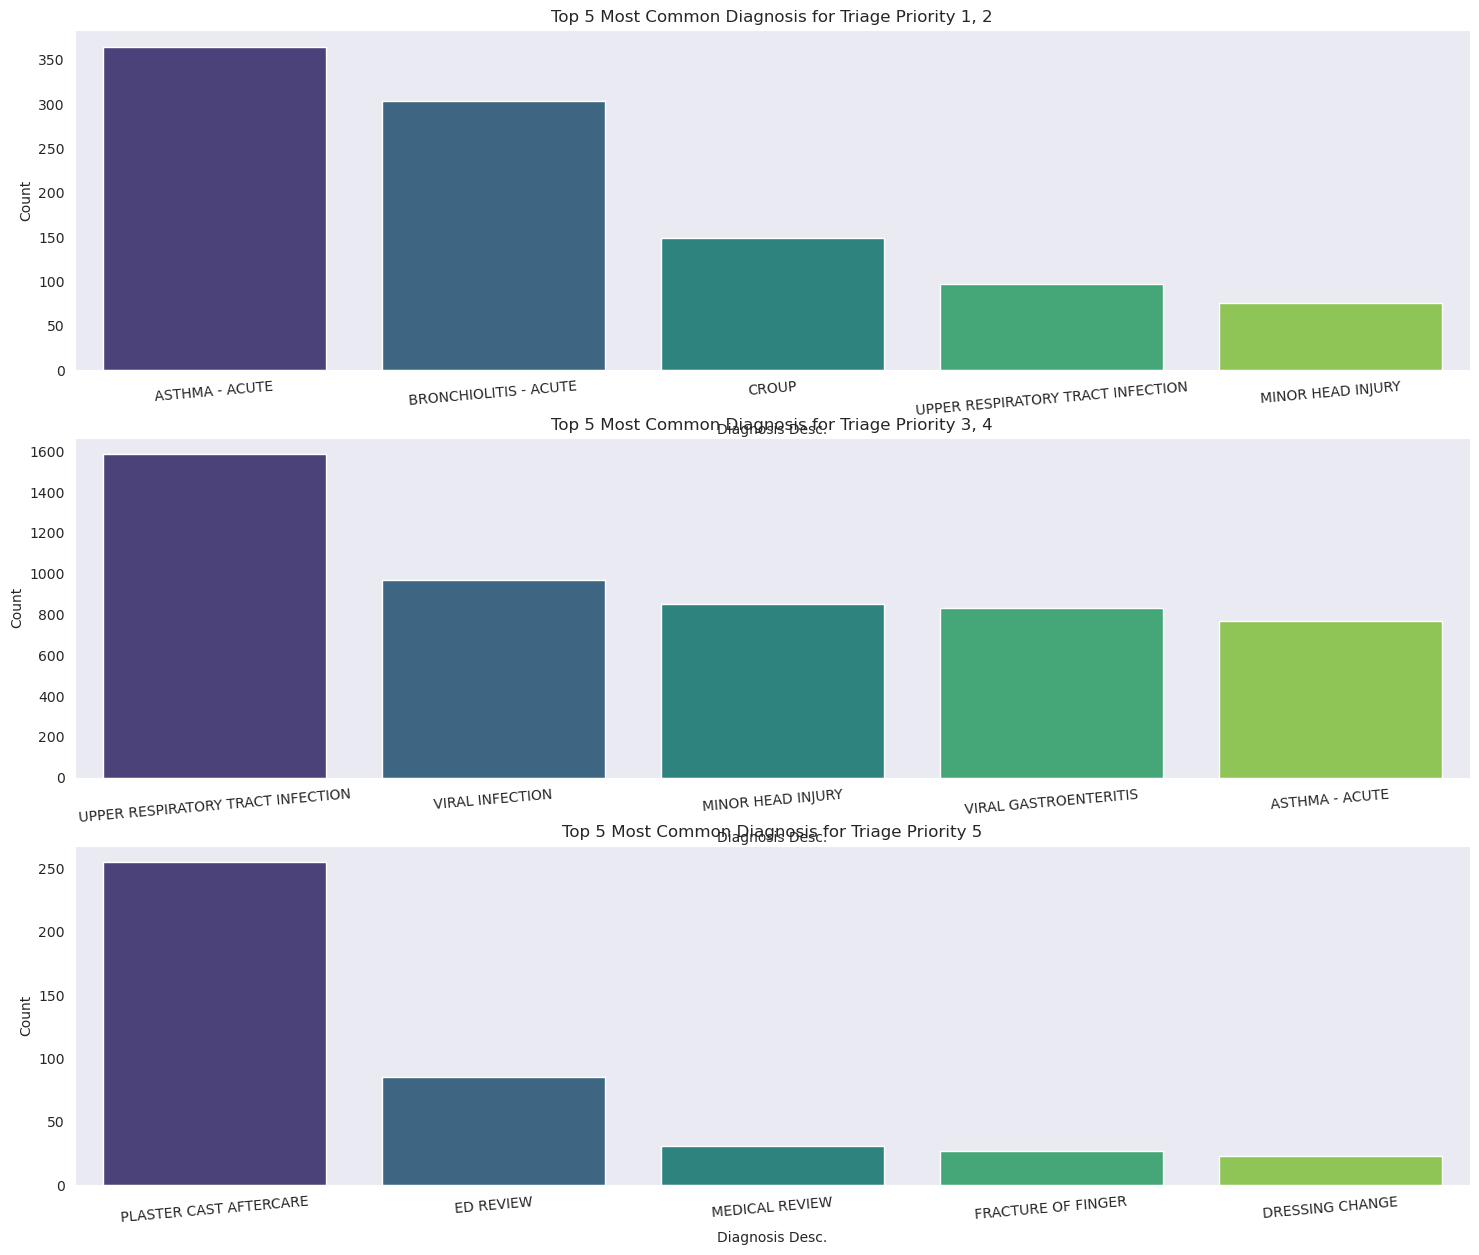

In [33]:
# Triage Groupings
triage_groups = [[1, 2], [3, 4], [5]]
fig, axes = plt.subplots(3, 1, figsize=(18, 15))
for i, group in enumerate(triage_groups):
    filtered_data = data.loc[data["Triage Priority"].isin(group)]
    top_diagnosis = filtered_data["Diagnosis Desc."].value_counts().head(5)
    sns.barplot(x=top_diagnosis.index, y=top_diagnosis.values, palette='viridis', ax=axes[i])
    axes[i].set_xlabel('Diagnosis Desc.')
    axes[i].set_ylabel('Count')
    axes[i].set_title(f'Top 5 Most Common Diagnosis for Triage Priority {", ".join(map(str, group))}')
    axes[i].tick_params(axis='x', rotation=5)
    axes[i].grid(axis='y')
plt.show()


- Most common cases for triage cases above 5 tend to be related to respiratory related issues. It appears that most patients that come to the children's hospital arrive due to upper respiratory issues (eg. bronchiolitis - acute, upper respiratory tract infection) or a head injury
- Instances with a triage priority of 5 are primarily consisting of plaster cast aftercare or review sessions. 

### Diagnosis interaction with seasons
We've seen what sort of diagnoses are distributed in different Triages.

Does seasons have an impact on the diagnoses?

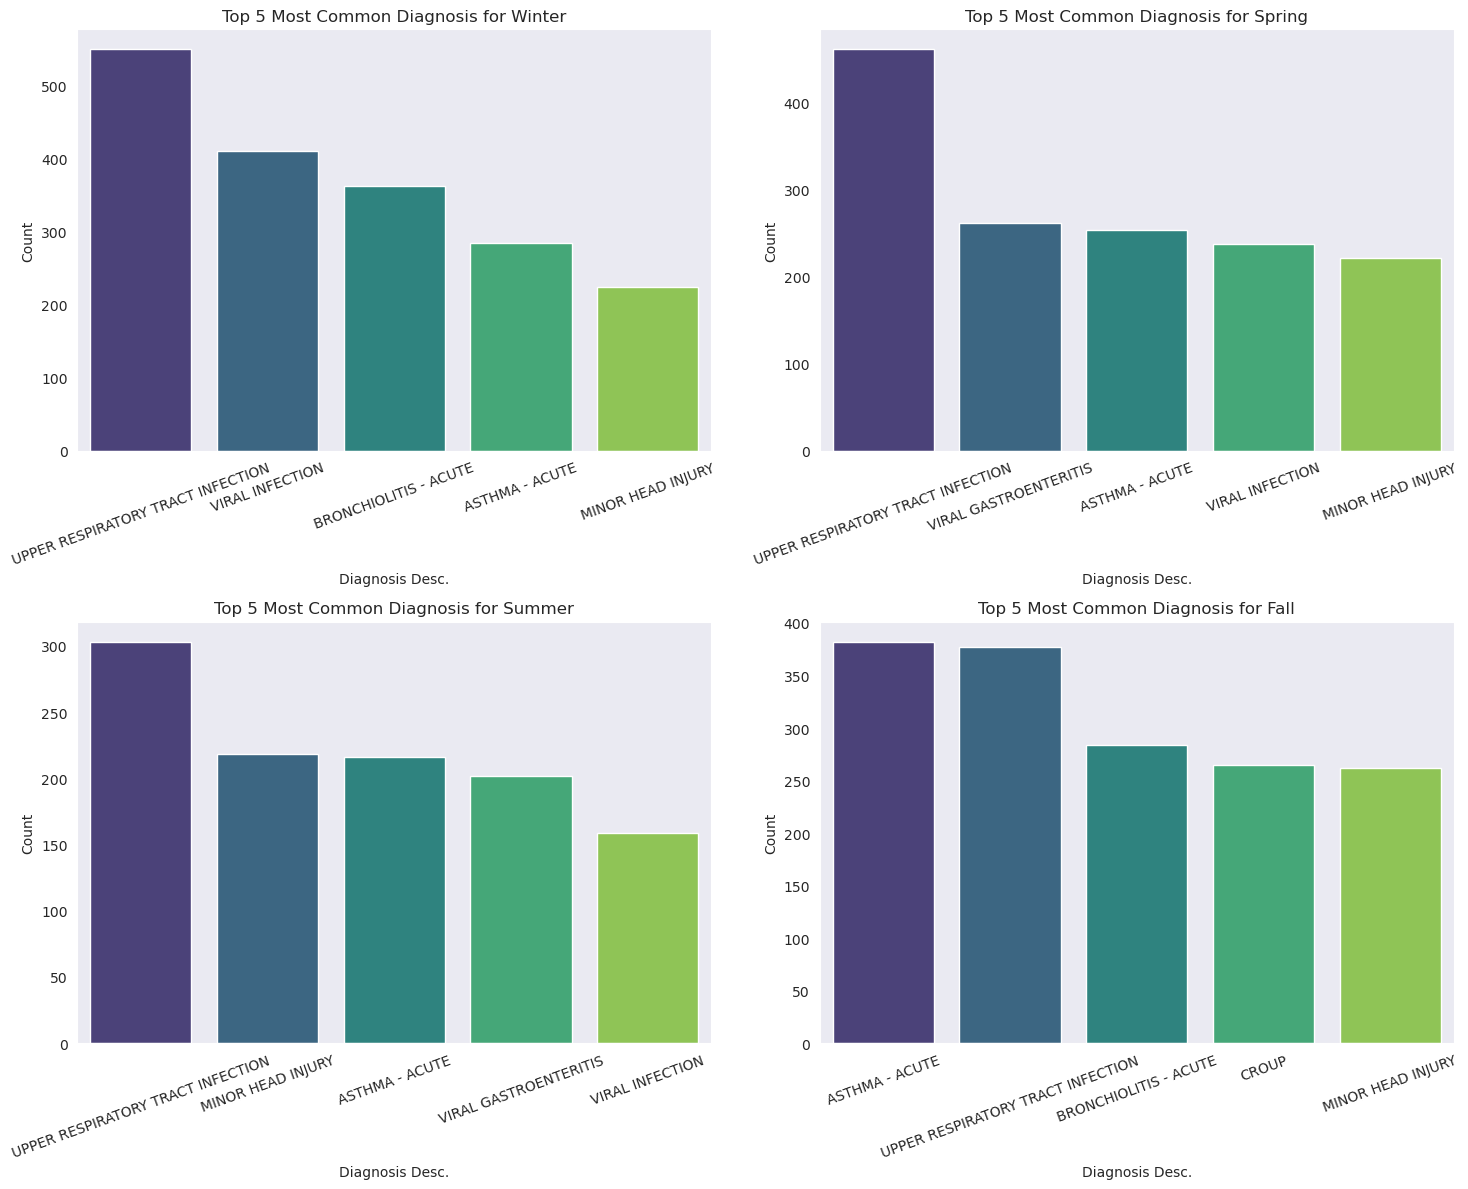

In [34]:
# Extract season information from the 'Arrival Date' column
data['Season'] = data['Arrival Date'].dt.month.map({
    1: 'Summer',
    2: 'Summer',
    3: 'Fall',
    4: 'Fall',
    5: 'Fall',
    6: 'Winter',
    7: 'Winter',
    8: 'Winter',
    9: 'Spring',
    10: 'Spring',
    11: 'Spring',
    12: 'Summer'
})

# Create subplots with 2 rows and 2 columns (for each season)
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Iterate through seasons and create subplots
for i, season in enumerate(['Winter', 'Spring', 'Summer', 'Fall']):
    row = i // 2
    col = i % 2
    
    filtered_data = data[data['Season'] == season]
    top_diagnosis = filtered_data["Diagnosis Desc."].value_counts().head(5)
    
    sns.barplot(x=top_diagnosis.index, y=top_diagnosis.values, palette='viridis', ax=axes[row, col])
    axes[row, col].set_xlabel('Diagnosis Desc.')
    axes[row, col].set_ylabel('Count')
    axes[row, col].set_title(f'Top 5 Most Common Diagnosis for {season}')
    axes[row, col].tick_params(axis='x', rotation=20)
    axes[row, col].grid(axis='y')

plt.tight_layout()
plt.show()


- Respiratory infections, asthma or minor head injuries seem to be the most prevalent kinds of diagnoses made in this children's hospital
- No matter what season, respiratory problems or viral infections are the most common problems faced in the children's hospital emergency room. 

### Admissions by season

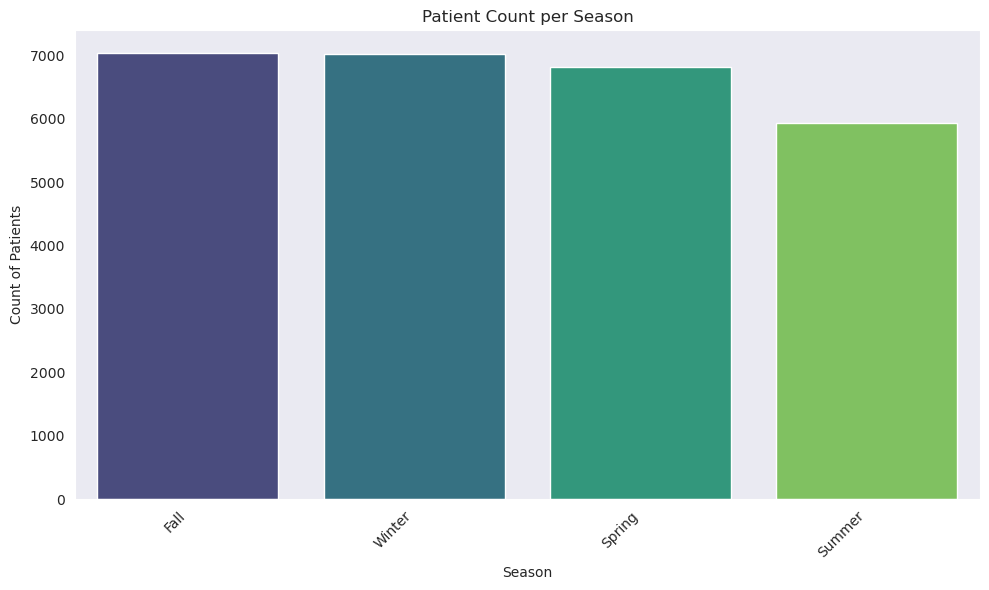

In [35]:
# Count the occurrences of each season
season_counts = data['Season'].value_counts()

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=season_counts.index, y=season_counts.values, palette='viridis')
plt.xlabel('Season')
plt.ylabel('Count of Patients')
plt.title('Patient Count per Season')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


- There is about a ~15% increase in patients from summer to winter. Keeping in mind that a majority of the patients are admitted due to respiratory infections, this data suggests that in colder climates when the flu season is is rampant, more children are admitted.

### Day of the week

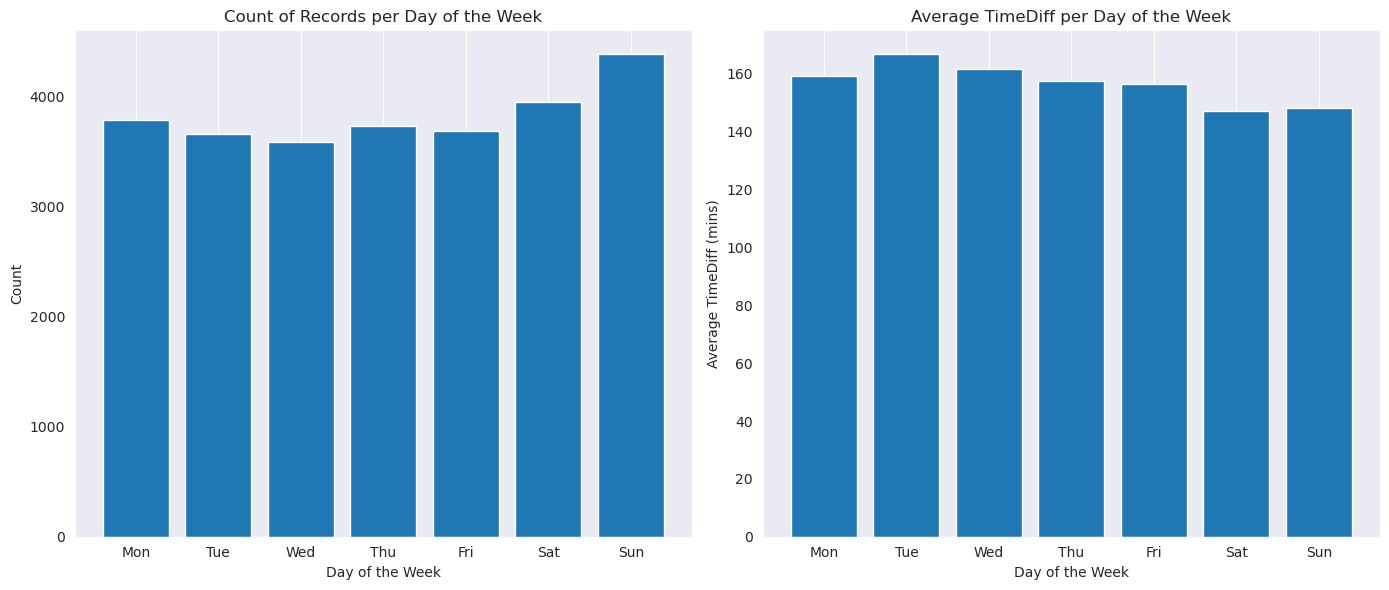

In [36]:
# Convert 'Arrival Date' column to datetime if it's not already
data['Arrival Date'] = pd.to_datetime(data['Arrival Date'])

# Extract the day of the week from the 'Arrival Date' column (Monday=0, Sunday=6)
data['Day of Week'] = data['Arrival Date'].dt.dayofweek

# Group data by 'Day of Week' and calculate count and average of 'TimeDiff TreatDrNr-Act. Depart (mins)'
grouped_data = data.groupby('Day of Week')['TimeDiff TreatDrNr-Act. Depart (mins)']

# Calculate the count and average for each day of the week
count_per_day = grouped_data.count()
average_per_day = grouped_data.mean()

# Create subplots with 1 row and 2 columns
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot the bar plot of count per day of the week
axes[0].bar(count_per_day.index, count_per_day.values)
axes[0].set_xlabel('Day of the Week')
axes[0].set_ylabel('Count')
axes[0].set_title('Count of Records per Day of the Week')
axes[0].set_xticks(range(7))
axes[0].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[0].grid(axis='y')

# Plot the bar plot of average time difference per day of the week
axes[1].bar(average_per_day.index, average_per_day.values)
axes[1].set_xlabel('Day of the Week')
axes[1].set_ylabel('Average TimeDiff (mins)')
axes[1].set_title('Average TimeDiff per Day of the Week')
axes[1].set_xticks(range(7))
axes[1].set_xticklabels(['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


- Most number of patients seen on sunday
- No distinct relationship evident with time duration from doctor diagnosis to departure. Peaks on Tuesday.

### Time duration between arrival to doctor treatment

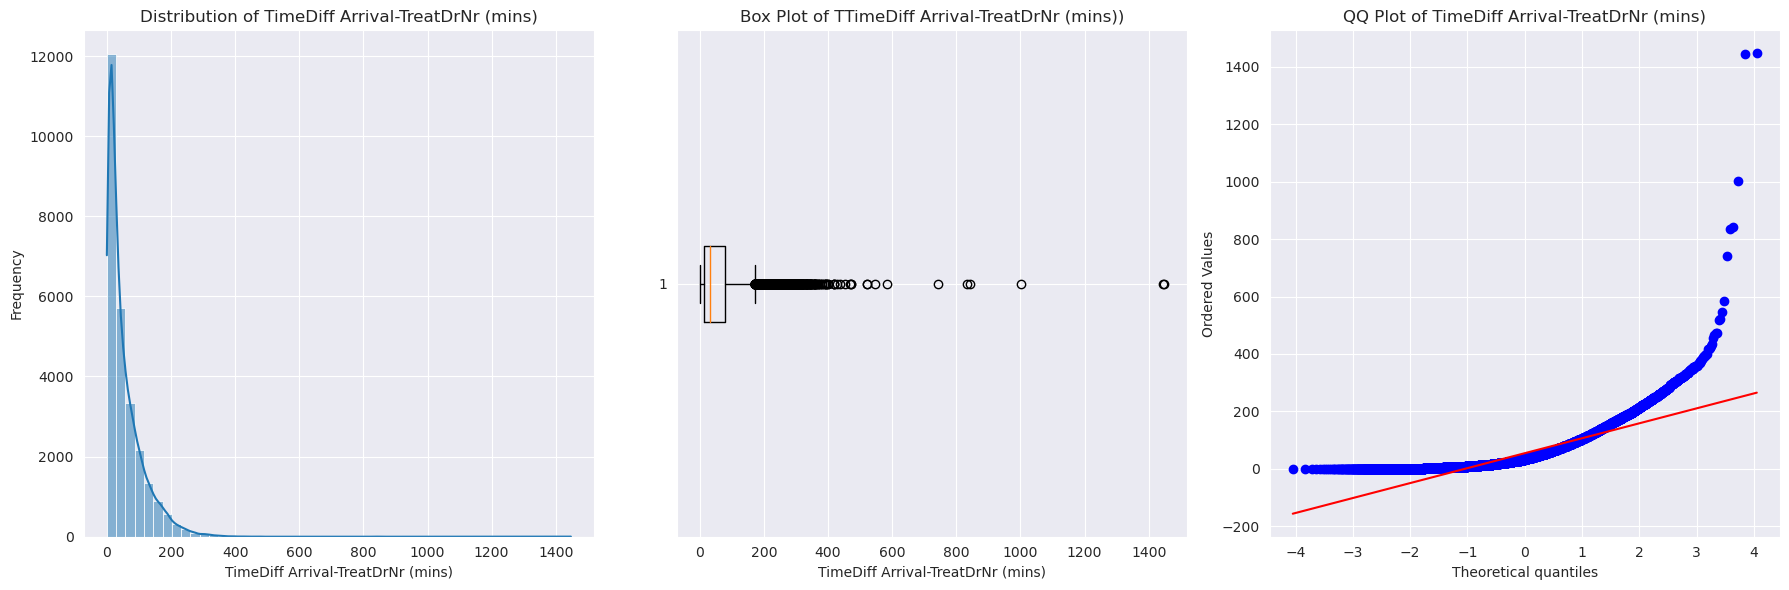

In [37]:
# Create subplots for the distribution plot, box plot, and QQ plot side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Distribution plot (using displot from seaborn)
sns.histplot(data["TimeDiff Arrival-TreatDrNr (mins)"], bins=50, kde=True, ax=ax1)
ax1.set_xlabel("TimeDiff Arrival-TreatDrNr (mins)")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of TimeDiff Arrival-TreatDrNr (mins)")

# Box plot
ax2.boxplot(data["TimeDiff Arrival-TreatDrNr (mins)"], vert=False)
ax2.set_xlabel("TimeDiff Arrival-TreatDrNr (mins)")
ax2.set_title("Box Plot of TTimeDiff Arrival-TreatDrNr (mins))")

# QQ plot
stats.probplot(data["TimeDiff Arrival-TreatDrNr (mins)"], plot=ax3)
ax3.set_title("QQ Plot of TimeDiff Arrival-TreatDrNr (mins)")

plt.tight_layout()
plt.show()


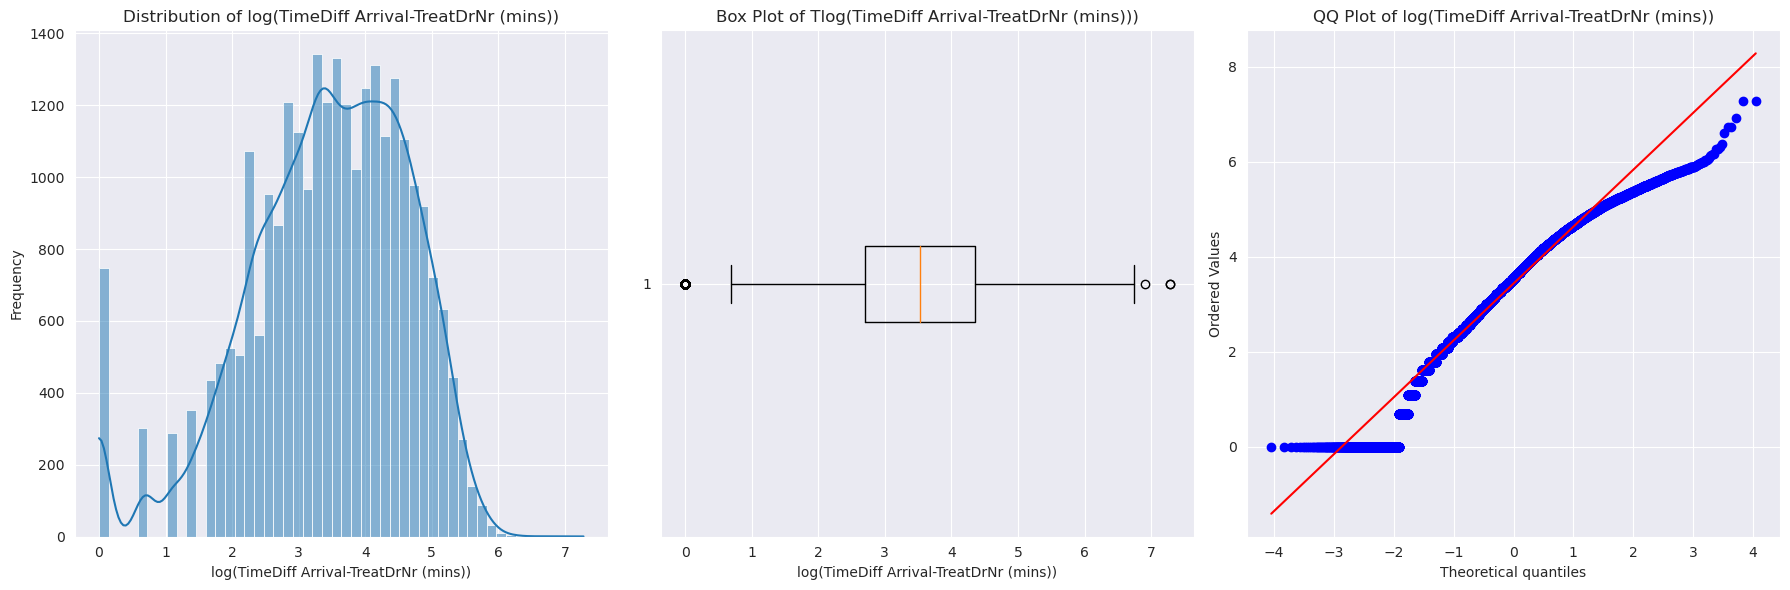

In [38]:
data['log(TimeDiff Arrival-TreatDrNr (mins))'] = np.log1p(data['TimeDiff Arrival-TreatDrNr (mins)'])

# Create subplots for the distribution plot, box plot, and QQ plot side by side
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Distribution plot (using displot from seaborn)
sns.histplot(data["log1p(TimeDiff Arrival-TreatDrNr (mins))"], bins=50, kde=True, ax=ax1)
ax1.set_xlabel("log1p(TimeDiff Arrival-TreatDrNr (mins))")
ax1.set_ylabel("Frequency")
ax1.set_title("Distribution of log(TimeDiff Arrival-TreatDrNr (mins))")

# Box plot
ax2.boxplot(data["log1p(TimeDiff Arrival-TreatDrNr (mins))"], vert=False)
ax2.set_xlabel("log1p(TimeDiff Arrival-TreatDrNr (mins))")
ax2.set_title("Box Plot of Tlog(TimeDiff Arrival-TreatDrNr (mins)))")

# QQ plot
stats.probplot(data["log1p(TimeDiff Arrival-TreatDrNr (mins))"], plot=ax3)
ax3.set_title("QQ Plot of log1p(TimeDiff Arrival-TreatDrNr (mins))")

plt.tight_layout()
plt.show()


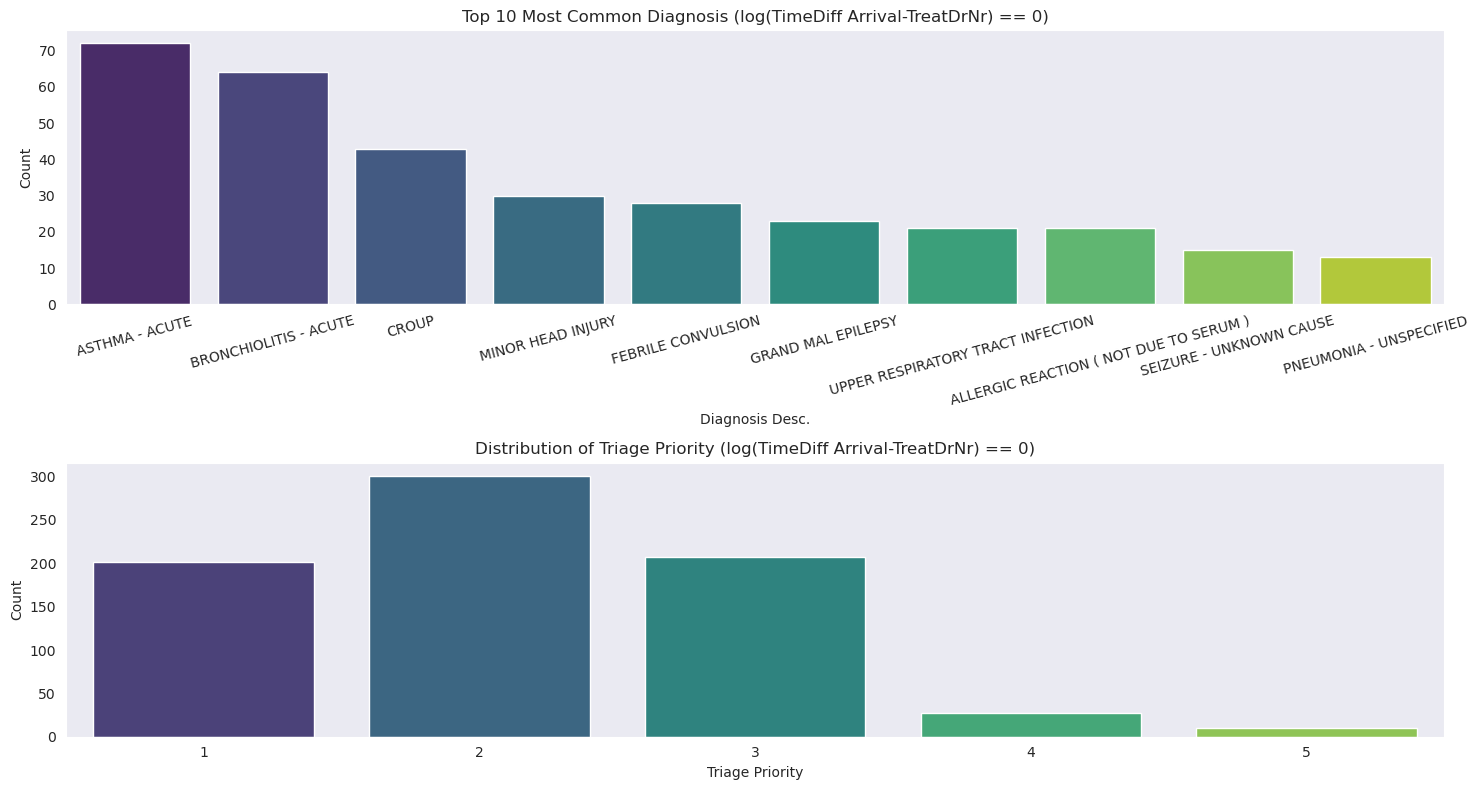

In [39]:
# Filter the data where log(TimeDiff Arrival-TreatDrNr (mins)) == 0
filtered_data = data.loc[data['log(TimeDiff Arrival-TreatDrNr (mins))'] == 0]

# Get the top 10 "Diagnosis Desc." counts for the filtered data
top_diagnosis = filtered_data['Diagnosis Desc.'].value_counts().head(10)

# Create subplots with 2 row and 1 columns
fig, axes = plt.subplots(2, 1, figsize=(15, 8))

# Plot the top 10 most common "Diagnosis Desc." for log(TimeDiff Arrival-TreatDrNr) == 0
sns.barplot(x=top_diagnosis.index, y=top_diagnosis.values, palette='viridis', ax=axes[0])
axes[0].set_xlabel('Diagnosis Desc.')
axes[0].set_ylabel('Count')
axes[0].set_title('Top 10 Most Common Diagnosis (log(TimeDiff Arrival-TreatDrNr) == 0)')
axes[0].tick_params(axis='x', rotation=15)
axes[0].grid(axis='y')

# Plot the distribution of "Triage Priority" for log(TimeDiff Arrival-TreatDrNr) == 0
triage_counts = filtered_data['Triage Priority'].value_counts()
triage_counts = triage_counts.sort_index()
sns.barplot(x=triage_counts.index, y=triage_counts.values, palette='viridis', ax=axes[1])
axes[1].set_xlabel('Triage Priority')
axes[1].set_ylabel('Count')
axes[1].set_title('Distribution of Triage Priority (log(TimeDiff Arrival-TreatDrNr) == 0)')
axes[1].tick_params(axis='x', rotation=0)
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()


- Most instances where a patient immediately saw a doctor were instances of acute asthma or infections that need immediate attention
- This is supported by triage distribution being heavily skewed to (1, 2) for these instances. The general data primarily contains triages of 3 or 4 but these rows when a patient was seen by a doctor straight away were urgent


In [40]:
# Calculate the mean and standard deviation of the log-transformed target
mean_log_transformed = data['log(TimeDiff Arrival-TreatDrNr (mins))'].mean()
std_log_transformed = data['log(TimeDiff Arrival-TreatDrNr (mins))'].std()
lower_threshold = mean_log_transformed - 3 * std_log_transformed
upper_threshold = mean_log_transformed + 3 * std_log_transformed

# Filter the data to keep only the rows within the threshold
outliers_data = data[(data['log(TimeDiff Arrival-TreatDrNr (mins))'] < lower_threshold) | (data['log(TimeDiff Arrival-TreatDrNr (mins))'] > upper_threshold)]
outliers_data

,Triage Priority,Age (yrs),Arrival Date,Dr Seen Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.,TimeDiff Arrival-TreatDrNr (mins),log(TimeDiff TreatDrNr-Act. Depart (mins)),Season,Day of Week,log(TimeDiff Arrival-TreatDrNr (mins))
12113,2,0,2009-10-22 08:49:00,2009-10-23 08:53:00,2009-10-23 13:25:00,ADMITTED (EXCL.ED BED),2F,1716,272.0,PAEDIATRIC,BRONCHIOLITIS - ACUTE,1444.0,5.609472,Spring,3,7.275865
20349,4,3,2010-05-11 09:27:00,2010-05-12 09:34:00,2010-05-12 09:36:00,PATIENT FOR DELETION BY CAMPUS ADMINISTRATOR,DNW,1449,2.0,PAEDIATRIC,PATIENT FOR DELETION BY CAMPUS ADMINISTRATOR,1447.0,1.098612,Fall,1,7.277939


- Keep all of the 0 values and outliers as they are all valid data. 

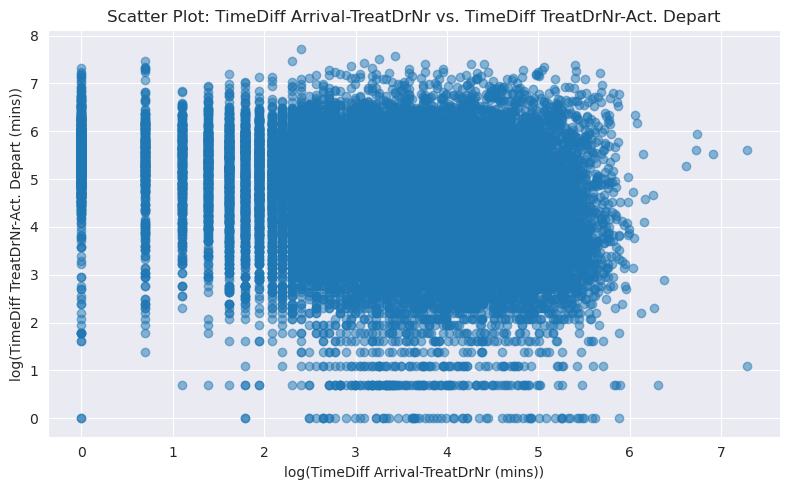

In [41]:
# Extract the columns for the scatter plot
x = data['log(TimeDiff Arrival-TreatDrNr (mins))']
y = data['log(TimeDiff TreatDrNr-Act. Depart (mins))']

# Create the scatter plot
plt.figure(figsize=(8, 5))
plt.scatter(x, y, alpha=0.5)
plt.xlabel('log(TimeDiff Arrival-TreatDrNr (mins))')
plt.ylabel('log(TimeDiff TreatDrNr-Act. Depart (mins))')
plt.title('Scatter Plot: TimeDiff Arrival-TreatDrNr vs. TimeDiff TreatDrNr-Act. Depart')
plt.grid(True)
plt.tight_layout()
plt.show()


- No obvious relationship visible

## Feature selection and engineering

Based on the findings we have found, it doesn't seem like any of the training variables have a very strong relationship with the target variable (Time duration between doctor to departure). It's not expected a highly accurate model could be generated from the data.

Let's first select features that are relevant to the model we're trying to build.


The fields "Arrival Date" and "Dr Seen Date" are very closely related. They are very closely correlated with the only difference in the dates being the minutes captured in "TimeDiff Arrival-TreatDrNr (mins)". As such, having both fields would add redundant data to the model. 

In [42]:
data = data.drop(["Dr Seen Date"], axis = 1)

In [43]:
data.head()

,Triage Priority,Age (yrs),Arrival Date,Depart Actual Date,Departure Status Desc.,Depart. Dest. Code,TimeDiff Arrival-Actual Depart (mins),TimeDiff TreatDrNr-Act. Depart (mins),Presenting Complaint Desc.,Diagnosis Desc.,TimeDiff Arrival-TreatDrNr (mins),log(TimeDiff TreatDrNr-Act. Depart (mins)),Season,Day of Week,log(TimeDiff Arrival-TreatDrNr (mins))
0,3,15,2009-01-01 00:17:00,2009-01-01 12:30:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,733,619.0,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS,114.0,6.429719,Summer,3,4.744932
2,4,8,2009-01-01 00:55:00,2009-01-01 01:08:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,13,0.0,EYE,CONJUNCTIVITIS,13.0,0.000000,Summer,3,2.639057
3,3,12,2009-01-01 03:22:00,2009-01-01 05:00:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,98,26.0,PAIN,OTITIS EXTERNA,72.0,3.295837,Summer,3,4.290459
4,4,15,2009-01-01 03:55:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,274,119.0,INJURY,KNEE SPRAIN / STRAIN,155.0,4.787492,Summer,3,5.049856
5,4,2,2009-01-01 06:40:00,2009-01-01 08:29:00,ED SERVICE EVENT COMPLETED - DISCHARGED,DISCH,109,9.0,INJURY,LACERATED FACE,100.0,2.302585,Summer,3,4.615121


- Features that are generated after a doctor sees a patient cannot be used in the model. For the model to be implemented in real time by the hospital after a doctor sees a patient, any data reflecting the departure of the customer will not be available
- these features can't be included to traing the model


In [44]:
training_vars = ['Triage Priority', ' Age  (yrs)', 'Arrival Date', 'Presenting Complaint Desc.', 'Diagnosis Desc.', 'log(TimeDiff Arrival-TreatDrNr (mins))']
test_var = ['log(TimeDiff TreatDrNr-Act. Depart (mins))']

In [45]:
training_df = data[training_vars]
test_df = data[test_var]

In [46]:
training_df

,Triage Priority,Age (yrs),Arrival Date,Presenting Complaint Desc.,Diagnosis Desc.,log(TimeDiff Arrival-TreatDrNr (mins))
0,3,15,2009-01-01 00:17:00,DRUG / ALCOHOL / POISONING,EMOTIONAL CRISIS,4.744932
2,4,8,2009-01-01 00:55:00,EYE,CONJUNCTIVITIS,2.639057
3,3,12,2009-01-01 03:22:00,PAIN,OTITIS EXTERNA,4.290459
4,4,15,2009-01-01 03:55:00,INJURY,KNEE SPRAIN / STRAIN,5.049856
5,4,2,2009-01-01 06:40:00,INJURY,LACERATED FACE,4.615121
...,...,...,...,...,...,...
30183,4,8,2010-12-30 21:11:00,FEVER,TONSILLITIS,3.970292
30184,3,0,2010-12-30 21:16:00,PAIN,VIRAL INFECTION,5.459586
30185,3,0,2010-12-30 22:28:00,COUGH,CROUP,4.983607
30186,3,6,2010-12-30 23:26:00,RESPIRATORY,PERTUSSIS,4.077537


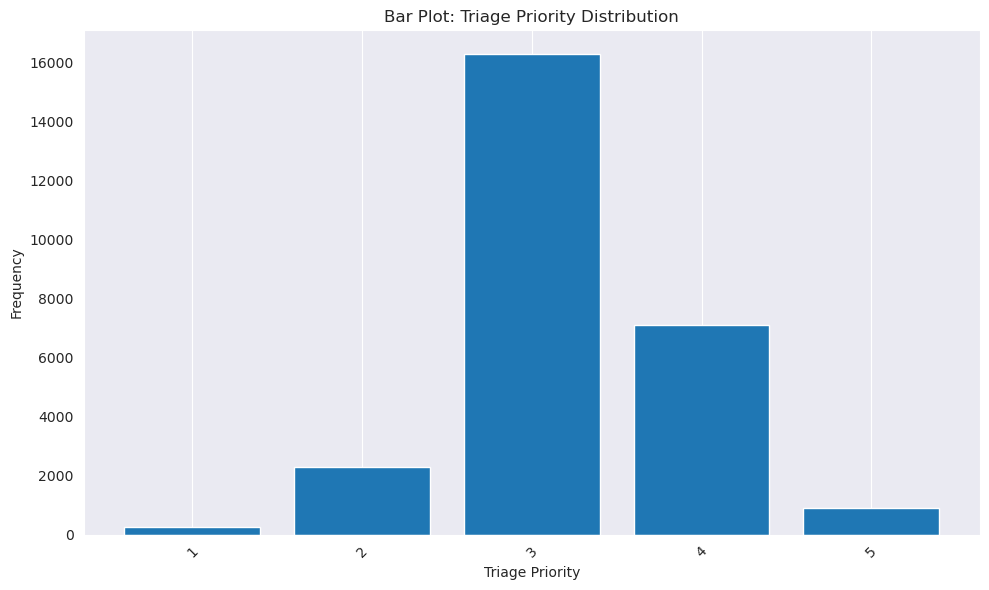

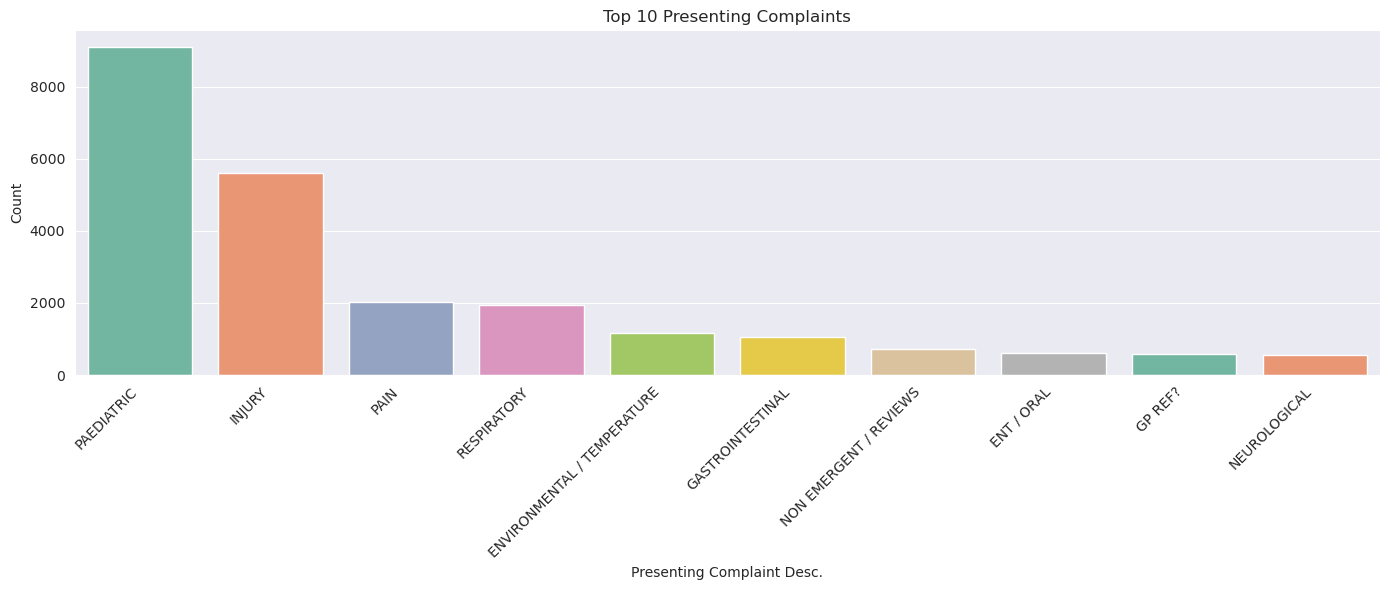

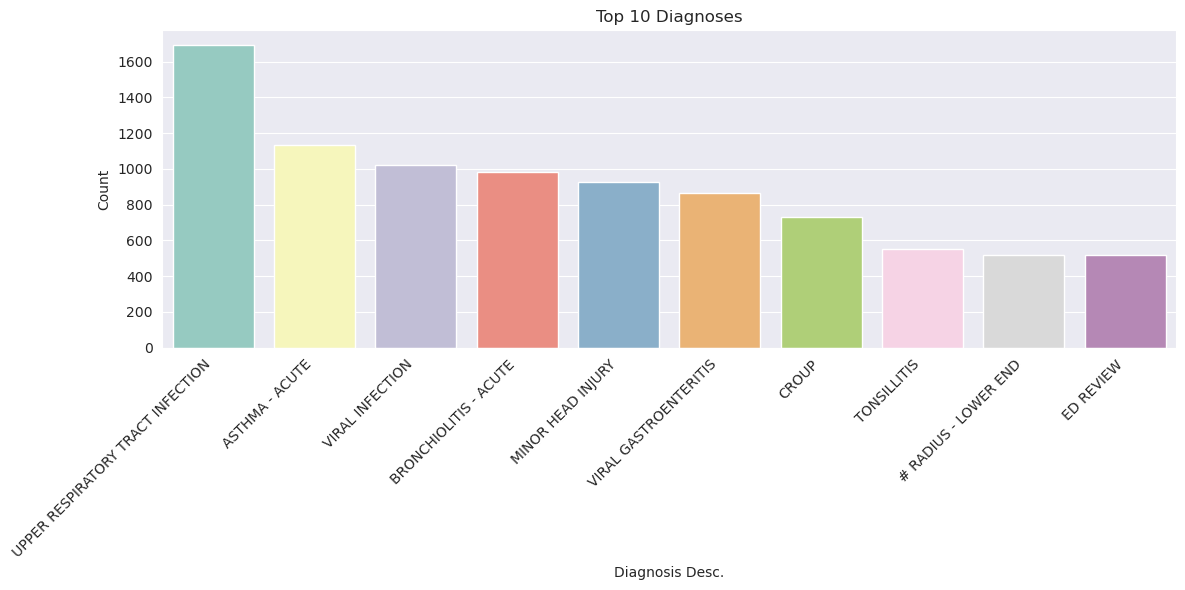

In [47]:
categorical = ["Triage Priority", "Presenting Complaint Desc.", "Diagnosis Desc."]
top_n = 10

# Plot count distribution for 'Triage Priority'
plt.figure(figsize=(10, 6))
plt.bar(triage_priority_counts.index, triage_priority_counts.values)
plt.xlabel('Triage Priority')
plt.ylabel('Frequency')
plt.title('Bar Plot: Triage Priority Distribution')
plt.grid(axis='y')
plt.xticks(rotation=45)
plt.tight_layout()
# Plot count distribution for 'Presenting Complaint Desc.'
plt.figure(figsize=(14, 6))
sns.countplot(x='Presenting Complaint Desc.', data=data, palette='Set2', order=data['Presenting Complaint Desc.'].value_counts().nlargest(top_n).index)
plt.xlabel('Presenting Complaint Desc.')
plt.ylabel('Count')
plt.title(f'Top {top_n} Presenting Complaints')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plot count distribution for 'Diagnosis Desc.'
plt.figure(figsize=(12, 6))
sns.countplot(x='Diagnosis Desc.', data=data, palette='Set3', order=data['Diagnosis Desc.'].value_counts().nlargest(top_n).index)
plt.xlabel('Diagnosis Desc.')
plt.ylabel('Count')
plt.title(f'Top {top_n} Diagnoses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Due to the training features consisting of many categorical variables, encoding these variables using label and one hto encoding inevitably leads to high dimensionality in the dataset. This creates problem in feature selection process. Models such as gradient boosting or random forest are great at handling high dimensional data for feature importance.

In addition, as we saw during our data exploration, none of numerical independent variables had an obvious linear correlation with the target variable. Implementing models like linear regression would only capture linear relationships in the model, which aren't too apparent within this data. On the otherhand, models like Random Forest and Gradient Boosting Regression are great at handling non linear relationships and high dimensionality, which is applicable to the training data at hand.

## Feature encoding: converting categorical data and non-numerical data to numerical features

In [48]:
# Create a copy of the DataFrame to avoid SettingWithCopyWarning
training_df_copy = training_df.copy()

# Extract month, day of the week, and hour from 'Arrival Date' using .dt
training_df_copy['Arrival_Month'] = training_df_copy['Arrival Date'].dt.month
training_df_copy['Arrival_Dayofweek'] = training_df_copy['Arrival Date'].dt.dayofweek
training_df_copy['Arrival_Hour'] = training_df_copy['Arrival Date'].dt.hour

# Drop the 'Arrival Date' column from the copied DataFrame
training_df_copy.drop(columns=['Arrival Date'], inplace=True)

training_df = training_df_copy


In [49]:
# Categorical data encoding
# Perform One-Hot Encoding for nominal categorical variables
nominal_cols = ['Presenting Complaint Desc.', 'Diagnosis Desc.']
training_df = pd.get_dummies(training_df, columns=nominal_cols, drop_first=True)

# Perform Label Encoding for ordinal categorical variable 'Triage Priority'
label_encoder = LabelEncoder()
training_df['Triage Priority'] = label_encoder.fit_transform(training_df['Triage Priority'])

In [50]:
# Drop the target variable from the DataFrame to get the features for training
X = training_df

# Get the target variable for training
y = test_df

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

# Initialize the models
rf_model = RandomForestRegressor(random_state=1)
gb_model = GradientBoostingRegressor(random_state=1)
lr_model = LinearRegression()

In [51]:
# Train the models
rf_model.fit(X_train, y_train.values.ravel())
gb_model.fit(X_train, y_train.values.ravel())
lr_model.fit(X_train, y_train.values.ravel())

# Predict on the test set
rf_predictions = rf_model.predict(X_test)
gb_predictions = gb_model.predict(X_test)
lr_predictions = lr_model.predict(X_test)


In [52]:
# Evaluate the models
rf_mse = mean_squared_error(y_test, rf_predictions)
rf_r2 = r2_score(y_test, rf_predictions)
gb_mse = mean_squared_error(y_test, gb_predictions)
gb_r2 = r2_score(y_test, gb_predictions)
lr_mse = mean_squared_error(y_test, lr_predictions)
lr_r2 = r2_score(y_test, lr_predictions)

# Print the results
print("Random Forest Regression:")
print("Mean Squared Error:", rf_mse)
print("R-squared:", rf_r2)
print("---------------------")
print("Gradient Boosting Regression:")
print("Mean Squared Error:", gb_mse)
print("R-squared:", gb_r2)
print("---------------------")
print("Linear Regression:")
print("Mean Squared Error:", lr_mse)
print("R-squared:", lr_r2)

Random Forest Regression:
Mean Squared Error: 1.0253373431942634
R-squared: 0.19860425951835226
---------------------
Gradient Boosting Regression:
Mean Squared Error: 0.9906659145638892
R-squared: 0.22570318008846846
---------------------
Linear Regression:
Mean Squared Error: 3536314708144903.5
R-squared: -2763956236374969.0


Random Forest and Gradient Boosting Regression are performing far better than Linear Regression as expected. As little to no linear relationships were apparent during our analysis, and due to high dimensionality, linear regression is not the ideal model for this task

Based on the lower Mean squared error value and higher R-squared value, at baseline, the Gradient Boosting Regression is performing best. The performance is still no means very high. Let's try seeing which features were most relevant

In [53]:
feature_importances = gb_model.feature_importances_

# Create a DataFrame to store feature names and their importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
top_10_features = importance_df.head(10)
bottom_10_features = importance_df.tail(10)

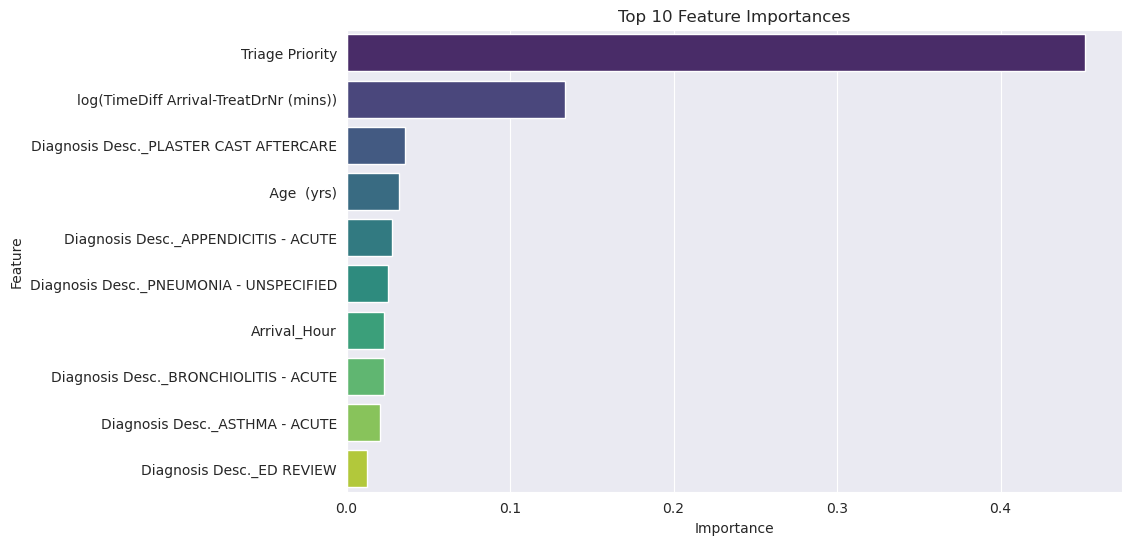

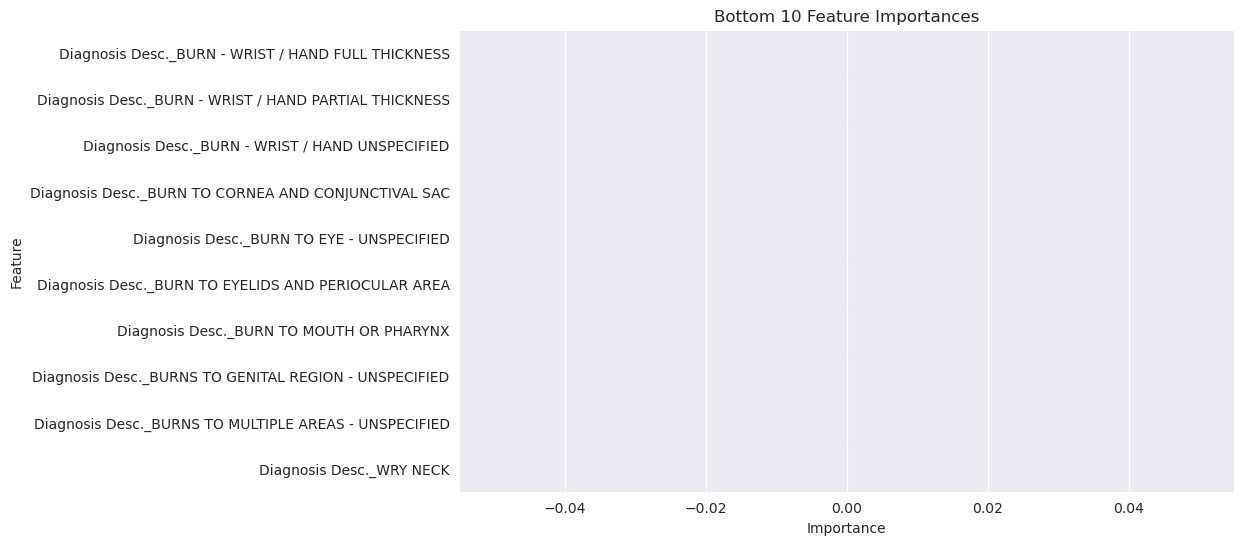

In [54]:
# Create the bar plots for top 10 and bottom 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances')
plt.show()
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=bottom_10_features, palette='viridis')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Bottom 10 Feature Importances')
plt.show()

- Triage Priority is by far the most important to predict the time duration spent after seeing a doctor 
- The time spent from arrival to seeing a doctor had the second most impact
- All the other features didn't have a high impact

As a gradient boost inherent utilises feature importance to handle high dimensional data, feature selection is not necessary. Let's move to tuning the hyper parameters

In [59]:
# Define the parameter grid for hyperparameter tuning
param_dist = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

random_search = RandomizedSearchCV(estimator=gb_model, param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, random_state=42)
random_search.fit(X_train, y_train.values.ravel())

# Get the best hyperparameters and model
best_params = random_search.best_params_
best_model = random_search.best_estimator_
gb_predictions = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, gb_predictions)
r2 = r2_score(y_test, gb_predictions)
print("Best Hyperparameters:", best_params)
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Best Hyperparameters: {'n_estimators': 100, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.1}
Mean Squared Error: 0.9727475925191598
R-squared: 0.23970800207075327


Based on these results, the model performed reasonably well. The MSE score being slightly less than 1 indicates that, on average, the model's predictions of the transformed target variable are approximately off by 1 unit from the actual values. The R-squared score of 0.24 suggests that the model explains about 24% of the variance in the data, which is a modest level of explanation.

It is important to note that the target variable was log-transformed, which affects the scale of the values. Therefore, any predictions made by the model in real-time must be reverse-transformed to obtain the actual values.

Considering the data the model was trained with, the results are in line with expectations. Variance in the target variable is expected due to various factors such as the number of doctors working at a given time, differences in patient characteristics, the varying severity of the same diagnosis, and other unaccounted factors. Some variables may not be captured in the data, and this can impact the target variable.

Overall, the model shows promise in capturing patterns and relationships within the data, but there are likely additional factors influencing the target variable that are not accounted for in the model. Further improvements could be made by incorporating more relevant features or exploring different modeling techniques.